# Business names

### Objective: What can we learn about business names? How can we use these insights? For example: Are there structural differences in business names correlated with company size? Can I figure out what type of company it is? etc.


## Exploratory Data Analysis

In [178]:
import numpy as np
import pandas as pd
import geopandas as gpd
import geotext
import collections
import string, sys, os, re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from IPython.display import Image
from functools import reduce
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [179]:
df = pd.read_csv("companies_sorted.csv")

In [180]:
df.head()

Unnamed: 0                       name         domain  year founded  \
0     5872184                        ibm        ibm.com        1911.0   
1     4425416  tata consultancy services        tcs.com        1968.0   
2       21074                  accenture  accenture.com        1989.0   
3     2309813                    us army     goarmy.com        1800.0   
4     1558607                         ey         ey.com        1989.0   

                              industry size range  \
0  information technology and services     10001+   
1  information technology and services     10001+   
2  information technology and services     10001+   
3                             military     10001+   
4                           accounting     10001+   

                                 locality         country  \
0       new york, new york, united states   united states   
1              bombay, maharashtra, india           india   
2                 dublin, dublin, ireland         ireland   
3     alexandria, virginia, united states   united states   
4  london, greater london, united kingdom  united kingdom   

                                     linkedin url  current employee estimate  \
0                        linkedin.com/company/ibm                     274047   
1  linkedin.com/company/tata-consultancy-services                     190771   
2                  linkedin.com/company/accenture                     190689   
3                    linkedin.com/company/us-army                     162163   
4              linkedin.com/company/ernstandyoung                     158363   

   total employee estimate  
0                   716906  
1                   341369  
2                   455768  
3                   445958  
4                   428960

In [181]:
df.shape

(7173426, 11)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173426 entries, 0 to 7173425
Data columns (total 11 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Unnamed: 0                 int64  
 1   name                       object 
 2   domain                     object 
 3   year founded               float64
 4   industry                   object 
 5   size range                 object 
 6   locality                   object 
 7   country                    object 
 8   linkedin url               object 
 9   current employee estimate  int64  
 10  total employee estimate    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 602.0+ MB


In [183]:
df.dtypes

Unnamed: 0                     int64
name                          object
domain                        object
year founded                 float64
industry                      object
size range                    object
locality                      object
country                       object
linkedin url                  object
current employee estimate      int64
total employee estimate        int64
dtype: object

## Data Cleaning

In [184]:
# Checking the redundancy and  eliminating them
df.drop(columns=['Unnamed: 0'], inplace=True)

The column 'Unamed: 0' most of the times represents the index. In this case, it is not related to each row so we will drop it.

### Working on missing values

In [185]:
# checking for any null values
df.isnull().sum()

name                               3
domain                       1650621
year founded                 3606980
industry                      290003
size range                         0
locality                     2508825
country                      2349207
linkedin url                       0
current employee estimate          0
total employee estimate            0
dtype: int64

In [186]:
# checking the null values by percentage
df.isna().sum() * 100 / len(df)

name                          0.000042
domain                       23.010219
year founded                 50.282529
industry                      4.042741
size range                    0.000000
locality                     34.973874
country                      32.748745
linkedin url                  0.000000
current employee estimate     0.000000
total employee estimate       0.000000
dtype: float64

In [187]:
# Dropping the rows that contain null values in "name", "industry", "locality" as we require those columns
df = df[df['name'].notna()]
df = df[df['industry'].notna()]


In [188]:
# Dropping rows that have null values from locality
#df = df[df['locality'].notna()]

In [189]:
# verifying against the null values
df.isna().sum()

name                               0
domain                       1473392
year founded                 3317945
industry                           0
size range                         0
locality                     2304053
country                      2148684
linkedin url                       0
current employee estimate          0
total employee estimate            0
dtype: int64

In [190]:
df.isna().sum() * 100 / len(df)

name                          0.000000
domain                       21.404941
year founded                 48.201984
industry                      0.000000
size range                    0.000000
locality                     33.472503
country                      31.215355
linkedin url                  0.000000
current employee estimate     0.000000
total employee estimate       0.000000
dtype: float64

In [191]:
df.head()

name         domain  year founded  \
0                        ibm        ibm.com        1911.0   
1  tata consultancy services        tcs.com        1968.0   
2                  accenture  accenture.com        1989.0   
3                    us army     goarmy.com        1800.0   
4                         ey         ey.com        1989.0   

                              industry size range  \
0  information technology and services     10001+   
1  information technology and services     10001+   
2  information technology and services     10001+   
3                             military     10001+   
4                           accounting     10001+   

                                 locality         country  \
0       new york, new york, united states   united states   
1              bombay, maharashtra, india           india   
2                 dublin, dublin, ireland         ireland   
3     alexandria, virginia, united states   united states   
4  london, greater london, united kingdom  united kingdom   

                                     linkedin url  current employee estimate  \
0                        linkedin.com/company/ibm                     274047   
1  linkedin.com/company/tata-consultancy-services                     190771   
2                  linkedin.com/company/accenture                     190689   
3                    linkedin.com/company/us-army                     162163   
4              linkedin.com/company/ernstandyoung                     158363   

   total employee estimate  
0                   716906  
1                   341369  
2                   455768  
3                   445958  
4                   428960

Filling the Nan values in 'year founded' with 0 and converting it into integer values.

In [192]:
df['year founded'].fillna(0, inplace=True)
df['year founded'] = df['year founded'].astype('int64')

In [193]:
# Checking the data types of every column
df.dtypes

name                         object
domain                       object
year founded                  int64
industry                     object
size range                   object
locality                     object
country                      object
linkedin url                 object
current employee estimate     int64
total employee estimate       int64
dtype: object

We can see that 'name', 'domain', 'industry', 'size range', 'locality', 'country' and 'linkedin url' are in the form of string values. Also, we know that 'year founded' should be in integer values. So, we will convert these columns to their corresponding correct data types.

In [194]:
# getting the columns with object data types
obj_col = df.select_dtypes(include='object').columns.tolist()
obj_col

['name',
 'domain',
 'industry',
 'size range',
 'locality',
 'country',
 'linkedin url']

In [195]:
df.head()

name         domain  year founded  \
0                        ibm        ibm.com          1911   
1  tata consultancy services        tcs.com          1968   
2                  accenture  accenture.com          1989   
3                    us army     goarmy.com          1800   
4                         ey         ey.com          1989   

                              industry size range  \
0  information technology and services     10001+   
1  information technology and services     10001+   
2  information technology and services     10001+   
3                             military     10001+   
4                           accounting     10001+   

                                 locality         country  \
0       new york, new york, united states   united states   
1              bombay, maharashtra, india           india   
2                 dublin, dublin, ireland         ireland   
3     alexandria, virginia, united states   united states   
4  london, greater london, united kingdom  united kingdom   

                                     linkedin url  current employee estimate  \
0                        linkedin.com/company/ibm                     274047   
1  linkedin.com/company/tata-consultancy-services                     190771   
2                  linkedin.com/company/accenture                     190689   
3                    linkedin.com/company/us-army                     162163   
4              linkedin.com/company/ernstandyoung                     158363   

   total employee estimate  
0                   716906  
1                   341369  
2                   455768  
3                   445958  
4                   428960

The datatypes of every column has been sorted.

### Checking for Duplicates

In [196]:
# Checking for duplicate columns
df.duplicated().all()

False

It seems like we do not have same columns that are duplicated. Hence, we are again sorted.

In [197]:
# Checking for duplicate rows
# Checking for column 'name' as it uniquely identifies company records and should not have duplicates
df.duplicated(subset=['name']).all()

False

So, we have unique row for name and no two rows are equal

### Univariate Analysis

In [198]:
# Here we will be analyzing each variable 
df.describe().transpose()

count         mean          std  min  25%  \
year founded               6883420.0  1036.865407  1000.340191  0.0  0.0   
current employee estimate  6883420.0    14.448108   361.973117  0.0  1.0   
total employee estimate    6883420.0    33.547708   892.356855  1.0  1.0   

                              50%     75%       max  
year founded               1952.0  2009.0    2103.0  
current employee estimate     1.0     4.0  274047.0  
total employee estimate       2.0     8.0  716906.0

The maximum value of year forunded will be 2103.0 and the minimum value  of current employee estimate is 0.


In [199]:
# Working with 'name' column and finding the unique value counts
name_df = df['name'].value_counts().rename_axis('name').reset_index(name='count')
name_df

name  count
0                independent consultant     63
1                            consultant     53
2                      private practice     53
3                           independent     49
4                independent contractor     40
...                                 ...    ...
6728512          kohler school district      1
6728513           instinto arquitectura      1
6728514                     tag my gift      1
6728515  figeac aero north america, inc      1
6728516    jne electrical contracts ltd      1

[6728517 rows x 2 columns]

In [200]:
# By value_counts, we have found out that there are some names that have been repeated
names_rep = name_df[name_df['count'] > 1].name.to_list()

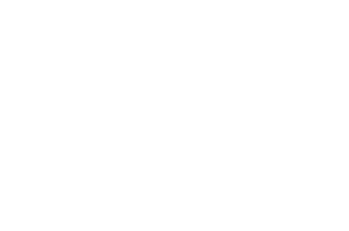

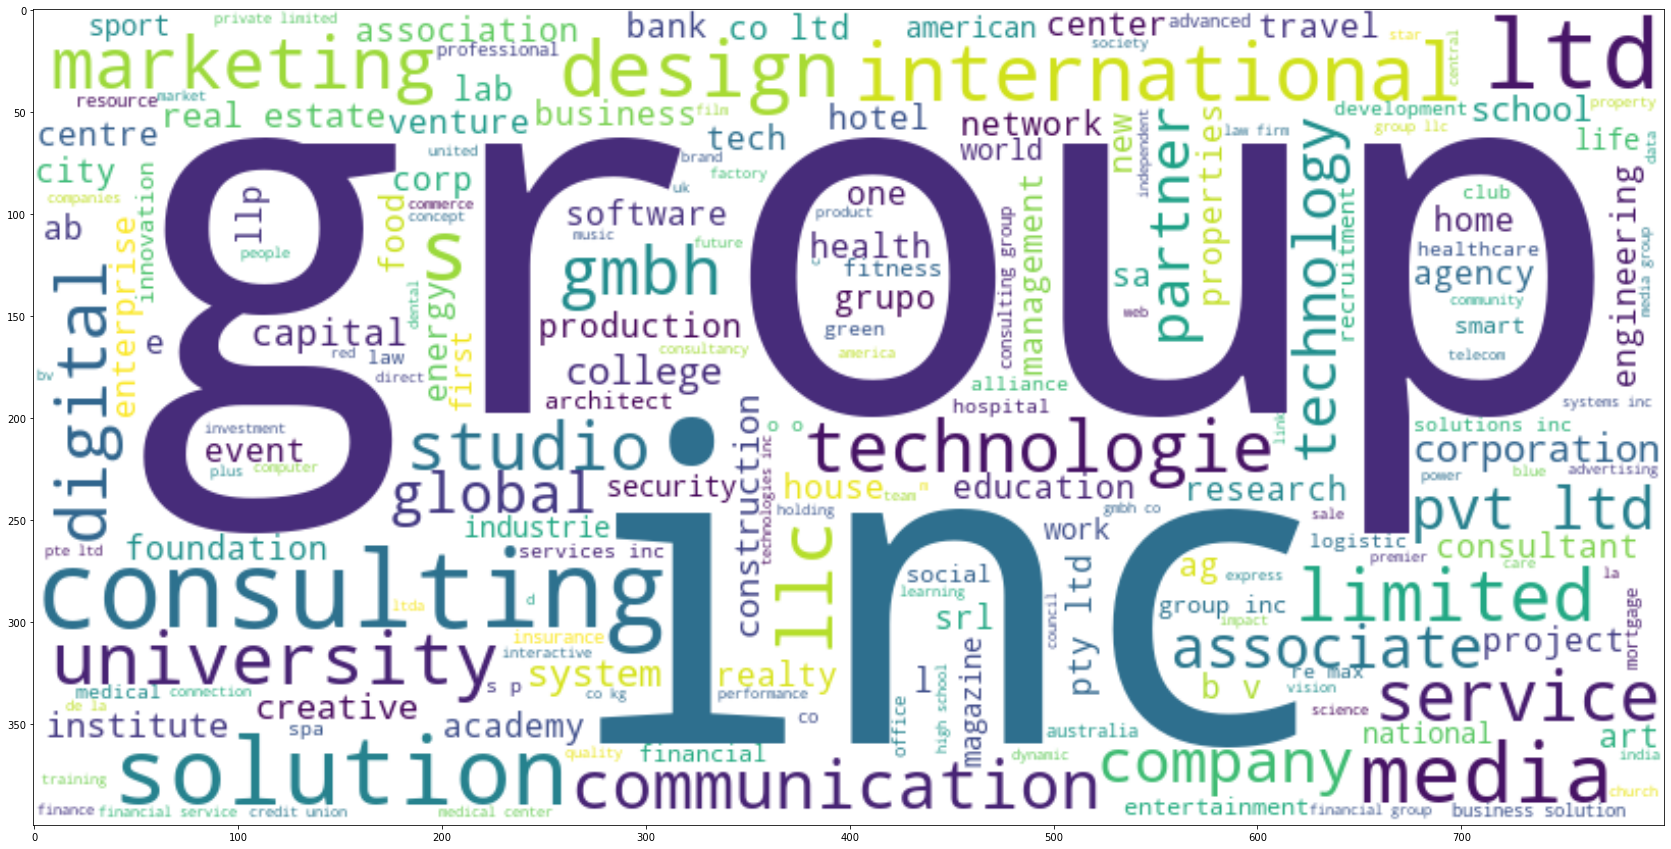

In [26]:
# Let's check those repeated names on word cloud
text = " ".join(name for name in df[df.name.isin(names_rep)].name)

# generate a word cloud image
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

# display the word cloud
plt.axis("off")
plt.figure(figsize=(30,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()



We see that the most repeated words are group, inc, ltd, consulting, solution, etc. This repitition will disturb our aim to draw insights from the dataset. Hence, it is a good idea to remove those repitition of the words.

In addition to this, we need to check if there are diverse characters other than english alphabets.

In [201]:
df = df[~df.name.isin(names_rep)]

In [202]:
# Let's filter out names with a character that is not an english alphabet or space
regexp = re.compile(r'[^a-zA-Z\s]')
df[df.name.apply(lambda x: regexp.search(x)).astype('bool')].name

9                                        at&t
17                       jpmorgan chase & co.
30                     mcdonald's corporation
57           ayatama energi, trisco nusantara
70            secretaría de educación pública
                          ...                
7173397        stone center for yoga & health
7173402                        woonartikel.nl
7173404                     squad sp. z o. o.
7173411    fuller, hadeed, & ros-planas, pllc
7173416                       fit plus s.r.o.
Name: name, Length: 2069320, dtype: object

In [203]:
# filtering out the names with non-asci characters, here I considered on the standard aschii characters 
regexp = re.compile(r'[^\x00-\x7f]')
df[df.name.apply(lambda x: regexp.search(x)).astype('bool')].name

70                           secretaría de educación pública
81                               verbum traducción y edición
93                                                   l'oréal
168                                   mondelēz international
208                                            itaú unibanco
                                 ...                        
7173288                          uab „plius“ filiāle latvija
7173295           efenex - eficiencia energética extremadura
7173307                                      stora sjöfallet
7173316    versorgungs- und verkehrsgesellschaft saarbrüc...
7173334                iglesia presbiteriana príncipe de paz
Name: name, Length: 286532, dtype: object

In [204]:
# filtering out names that contain digits
regexp = re.compile(r'[0-9]')
df[df.name.apply(lambda x: regexp.search(x)).astype('bool')].name

132                        3m health care
456                           century 21®
1074               level 3 communications
1179                           forever 21
1317                      24 hour fitness
                        ...              
7173166               professionals2match
7173169                    smpn 4 ngaglik
7173364                sia ekspresis 1818
7173378           304000 medienkreationen
7173386    agile4ever consulting services
Name: name, Length: 177123, dtype: object

Since there are different conpanies from all over the countries, we see alot of digits, punctuations and alot of non-english languages.

There are 145466613 words in the combination of all cells in the column 'name'.


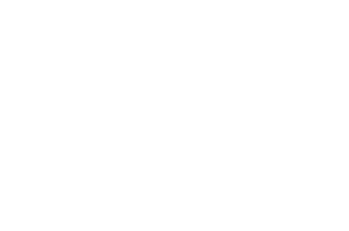

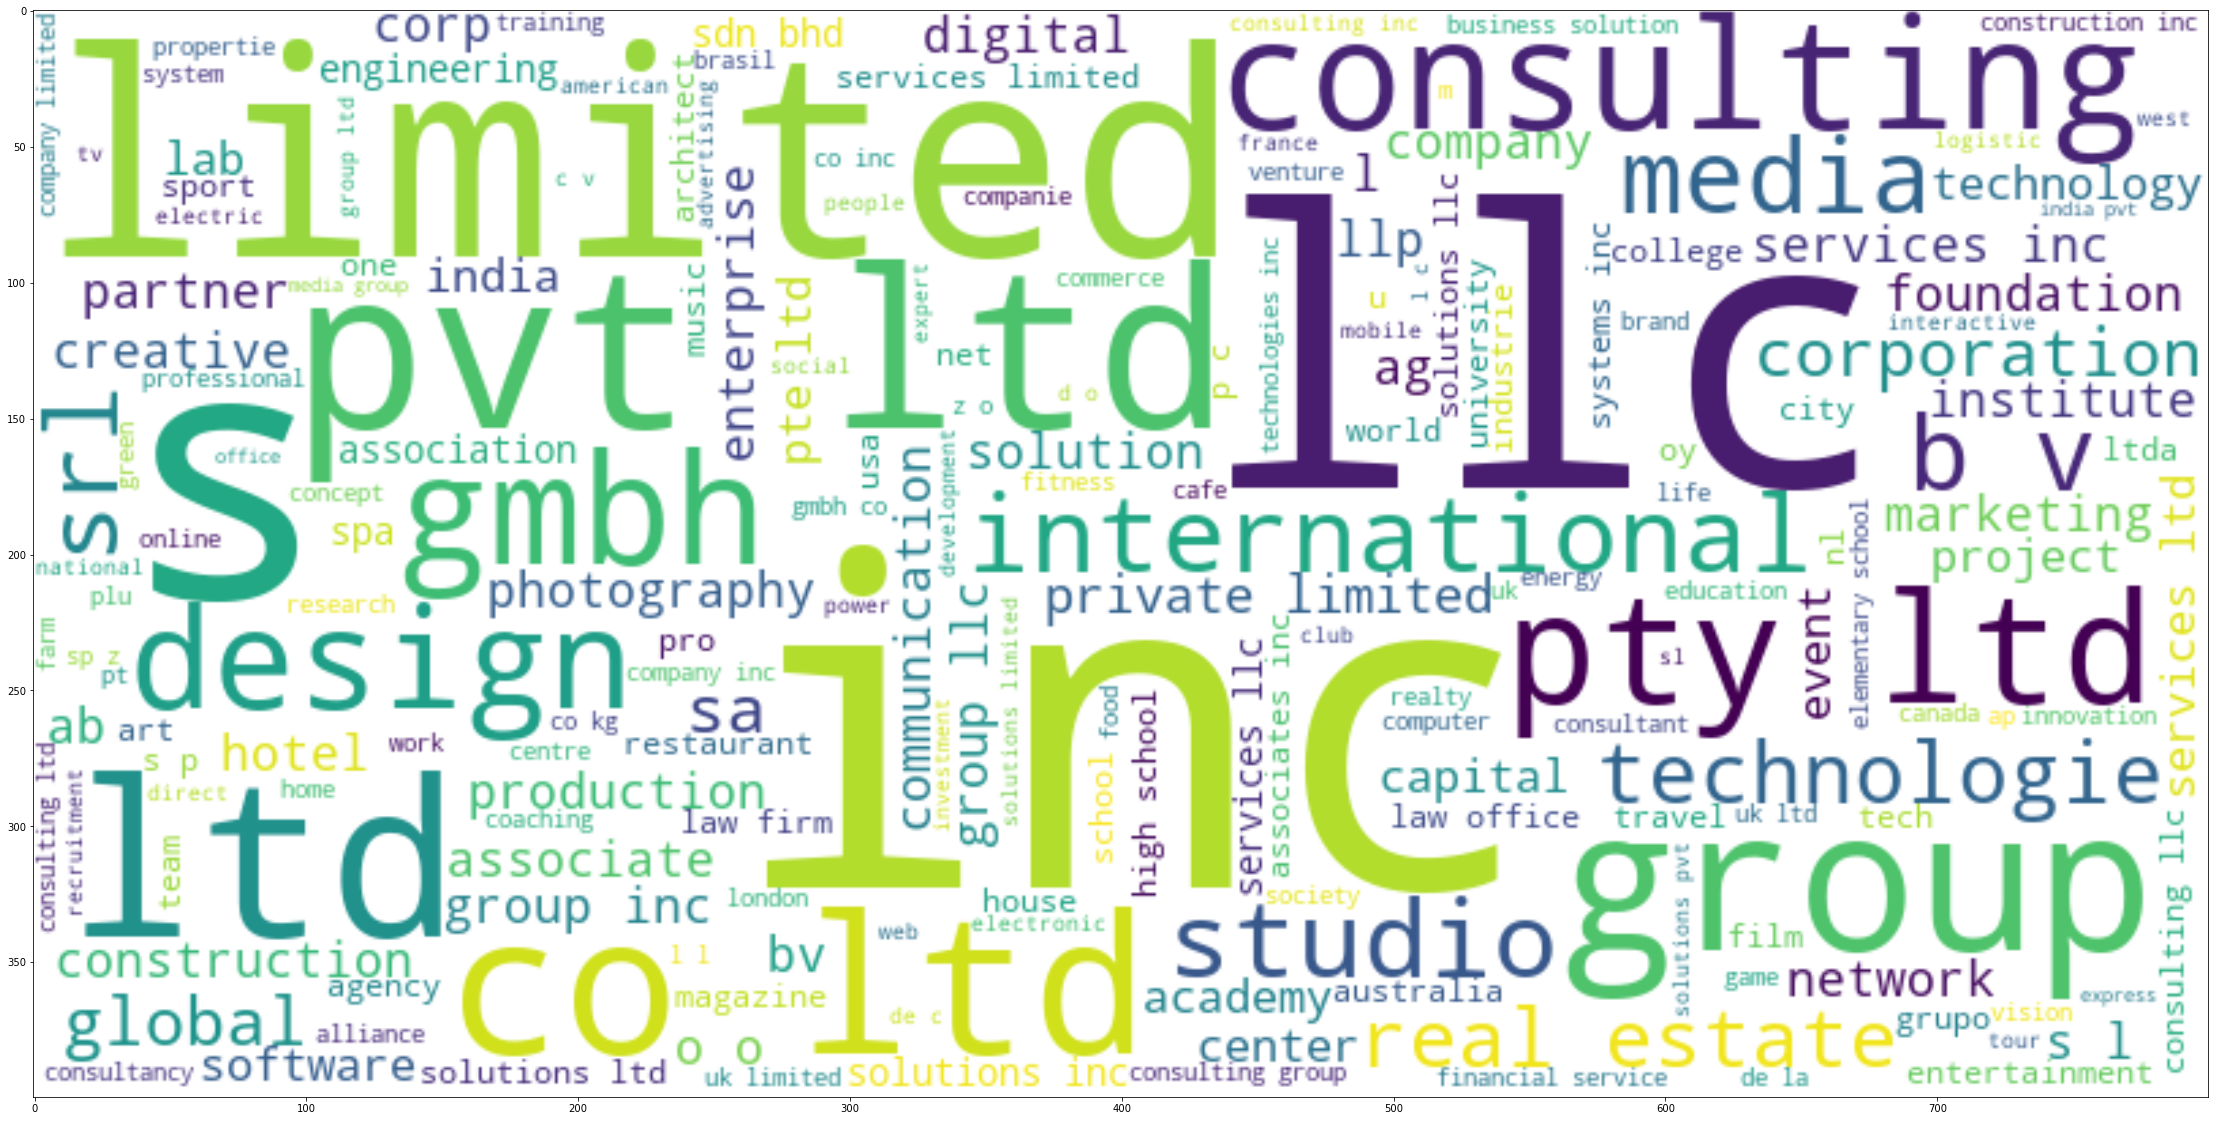

In [33]:
# Most common words in company names
text = " ".join(name for name in df.name)
print ("There are {} words in the combination of all cells in the column 'name'.".format(len(text)))

# generate a word cloud image
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

# display the word cloud
plt.axis("off")
plt.figure(figsize=(40,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

Conclusions from the above world cloud
- Repetition of words like llc, inc, limited, consulting
- Some companies use single letter to name their organization, like S, b, v. These letters are abbreviations ending with a period(.)

In [205]:
# Year Founded
# checking the unique values
year_df = df['year founded'].value_counts().rename_axis('year founded').reset_index(name='count')
year_df

year founded    count
0               0  3184155
1            2015   225321
2            2014   223763
3            2013   214206
4            2012   204219
..            ...      ...
228          2023        1
229          1799        1
230          1792        1
231          1451        1
232          2103        1

[233 rows x 2 columns]

In the above output, 0 is the common value as it was replaced with null values with it. We will first analyse the number of companies founded before 1900.

In [206]:
df.query("0 < `year founded` < 1900")['year founded'].value_counts().rename_axis('year founded').reset_index(name='count')

year founded  count
0            1898    904
1            1896    829
2            1890    822
3            1895    736
4            1889    731
..            ...    ...
99           1775      3
100          1789      2
101          1451      1
102          1799      1
103          1792      1

[104 rows x 2 columns]

In [207]:
# companies founded before 1800
df.query("0 < `year founded` < 1800")['year founded'].value_counts().rename_axis('year founded').reset_index(name='count')

year founded  count
0          1775      3
1          1789      2
2          1451      1
3          1792      1
4          1799      1

In [208]:
# Also, we will check the values more than 2022
df[df['year founded'] > 2022]

name                      domain  \
478790     islamabad recruitment company(irco)                 irco.com.pk   
1685181                              nativalab               nativalab.com   
1911596                        royal knight ag  royalknightagriculture.com   
2802880  b.s.b. international career pvt.  ltd     bsbinternational.org.uk   
2939095                       creativwire inc.             creativwire.com   
5636056                  apollo management llc         apollomanagement.co   
6863658                             swipes app               getswipes.com   
6920143                              noyfb ltd                         NaN   

         year founded                      industry size range  \
478790           2029  health, wellness and fitness   51 - 200   
1685181          2023                        design    11 - 50   
1911596          2027                       farming     1 - 10   
2802880          2025               human resources     1 - 10   
2939095          2103                      internet     1 - 10   
5636056          2025         management consulting     1 - 10   
6863658          2025                      internet     1 - 10   
6920143          2025               capital markets     1 - 10   

                                      locality        country  \
478790          islamabad, islamabad, pakistan       pakistan   
1685181                milano, lombardy, italy          italy   
1911596  bensalem, pennsylvania, united states  united states   
2802880           calcutta, west bengal, india          india   
2939095      new york, new york, united states  united states   
5636056                                    NaN            NaN   
6863658                                    NaN            NaN   
6920143                                    NaN            NaN   

                                              linkedin url  \
478790   linkedin.com/company/islamabad-recruitment-com...   
1685181                     linkedin.com/company/nativalab   
1911596               linkedin.com/company/royal-knight-ag   
2802880  linkedin.com/company/b-s-b-international-caree...   
2939095              linkedin.com/company/creativwire-inc-   
5636056         linkedin.com/company/apollo-management-llc   
6863658                    linkedin.com/company/swipes-app   
6920143                     linkedin.com/company/noyfb-ltd   

         current employee estimate  total employee estimate  
478790                          19                       34  
1685181                          4                        9  
1911596                          3                        4  
2802880                          2                        2  
2939095                          2                        3  
5636056                          1                        3  
6863658                          0                        3  
6920143                          0                        1

Let's remove these records

In [209]:
df.drop(df.index[df['year founded'] > 2021], inplace=True)

Since we do not need the companies founded after 2022, we will drop it

In [210]:
df[df['year founded'] < 1900]

name                        domain  \
9                                  at&t                       att.com   
17                 jpmorgan chase & co.             jpmorganchase.com   
18                              us navy                      navy.com   
21                              siemens                   siemens.com   
46                               pfizer                    pfizer.com   
...                                 ...                           ...   
7173418           koop media management                           NaN   
7173420             inkredible printing                           NaN   
7173423      catholic bishop of chicago                           NaN   
7173424             medexo robotics ltd                           NaN   
7173425  dynamic controls solutions inc  dynamiccontrolssolutions.com   

         year founded                             industry size range  \
9                1876                   telecommunications     10001+   
17               1823                   financial services     10001+   
18                  0                             military     10001+   
21               1847  electrical/electronic manufacturing     10001+   
46               1848                      pharmaceuticals     10001+   
...               ...                                  ...        ...   
7173418             0                      broadcast media     1 - 10   
7173420             0  information technology and services     1 - 10   
7173423             0               religious institutions     1 - 10   
7173424             0                             research     1 - 10   
7173425             0                           automotive     1 - 10   

                                                locality         country  \
9                           dallas, texas, united states   united states   
17                     new york, new york, united states   united states   
18       washington, district of columbia, united states   united states   
21                              munich, bavaria, germany         germany   
46                     new york, new york, united states   united states   
...                                                  ...             ...   
7173418                                              NaN             NaN   
7173420               artesia, new mexico, united states   united states   
7173423               inverness, illinois, united states   united states   
7173424                   london, london, united kingdom  united kingdom   
7173425                   wixom, michigan, united states   united states   

                                              linkedin url  \
9                                linkedin.com/company/at&t   
17                     linkedin.com/company/jpmorgan-chase   
18                            linkedin.com/company/us-navy   
21                            linkedin.com/company/siemens   
46                             linkedin.com/company/pfizer   
...                                                    ...   
7173418         linkedin.com/company/koop-media-management   
7173420           linkedin.com/company/inkredible-printing   
7173423    linkedin.com/company/catholic-bishop-of-chicago   
7173424           linkedin.com/company/medexo-robotics-ltd   
7173425  linkedin.com/company/dynamic-controls-solution...   

         current employee estimate  total employee estimate  
9                           115188                   269659  
17                           95234                   242135  
18                           94458                   325740  
21                           87381                   240528  
46                           59588                   176364  
...                            ...                      ...  
7173418                          0                        1  
7173420                          0                        1  
7173423                          0                        1  
717

In [211]:
df.dtypes

name                         object
domain                       object
year founded                  int64
industry                     object
size range                   object
locality                     object
country                      object
linkedin url                 object
current employee estimate     int64
total employee estimate       int64
dtype: object

In [68]:
#convert_to_string(df, obj_col)
#df[obj_col] = df[obj_col].astype(str)

In [69]:
df.dtypes

name                         object
domain                       object
year founded                  int64
industry                     object
size range                   object
locality                     object
country                      object
linkedin url                 object
current employee estimate     int64
total employee estimate       int64
dtype: object

In [212]:
year_df = df['year founded'].value_counts().rename_axis('year founded').reset_index(name='count')
year_df

year founded    count
0               0  3184155
1            2015   225321
2            2014   223763
3            2013   214206
4            2012   204219
..            ...      ...
222          1789        2
223          1799        1
224          1792        1
225          1451        1
226          2021        1

[227 rows x 2 columns]

In [214]:
year_df['year founded'] > 1900

0      False
1       True
2       True
3       True
4       True
       ...  
222    False
223    False
224    False
225    False
226     True
Name: year founded, Length: 227, dtype: bool

In [215]:
year_df = df['year founded'].value_counts().rename_axis('year founded').reset_index(name='count')
year_df

year founded    count
0               0  3184155
1            2015   225321
2            2014   223763
3            2013   214206
4            2012   204219
..            ...      ...
222          1789        2
223          1799        1
224          1792        1
225          1451        1
226          2021        1

[227 rows x 2 columns]

<AxesSubplot:xlabel='year founded', ylabel='Count'>

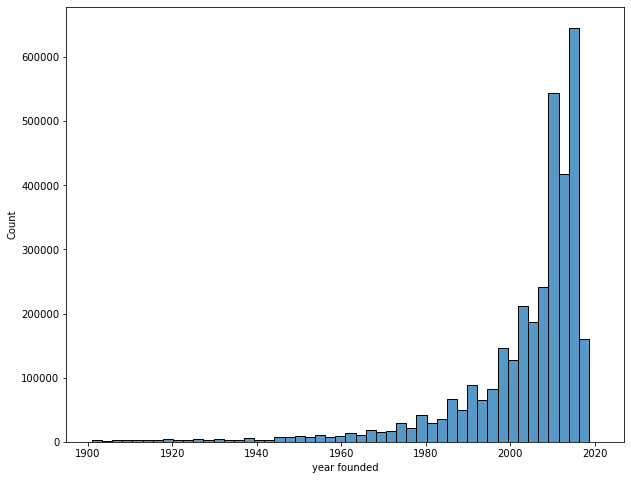

In [216]:
plt.figure(figsize=(10, 8))
sns.histplot(bins = 50, x = "year founded", data = df[df['year founded'] > 1900])

##### Industry

In [217]:
# unique value counts
ind_df = df['industry'].value_counts().rename_axis('industry').reset_index(name='count')
ind_df

industry   count
0    information technology and services  428200
1              marketing and advertising  319589
2                           construction  250232
3                  management consulting  185604
4                            real estate  185008
..                                   ...     ...
143                              fishery    2295
144                             ranching    2272
145                 railroad manufacture    1755
146                              tobacco    1324
147                   legislative office     499

[148 rows x 2 columns]

The companies in this dataset work in 148 industries, where the most common is information technologies and services.

<AxesSubplot:xlabel='count', ylabel='industry'>

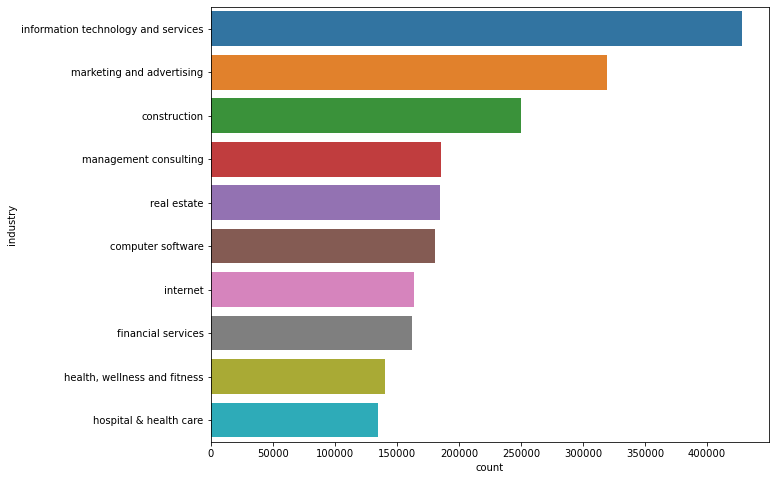

In [228]:
# Visualising and figuring out the most common industry
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='industry',data = ind_df.nlargest(10, 'count'))


##### Size range

In [219]:
# performing value counts
size_df = df['size range'].value_counts().rename_axis('size range').reset_index(name='count')
size_df

size range    count
0        1 - 10  5123116
1       11 - 50  1065971
2      51 - 200   294242
3     201 - 500    67694
4    501 - 1000    23581
5   1001 - 5000    19721
6  5001 - 10000     2259
7        10001+     1314

<AxesSubplot:ylabel='size range'>

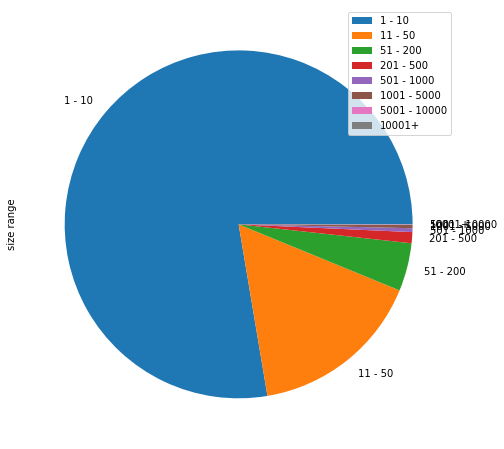

In [220]:
# plotting pie chart to check how are the companies characterized according to the number of employees
plt.figure(figsize=(12, 8))
df['size range'].value_counts().plot(kind="pie", legend = True)

Majiority of the companies have less than or equal to 50. This shows that there are more number of startup companies than the product based companies.

##### Locality

In [221]:
# value counts
locality_df = df['locality'].value_counts().rename_axis('locality').reset_index(name='count')
locality_df

locality  count
0      london, greater london, united kingdom  81734
1           new york, new york, united states  62181
2                       madrid, madrid, spain  55484
3                paris, île-de-france, france  32386
4              london, london, united kingdom  29962
...                                       ...    ...
94431              vare, hallands lan, sweden      1
94432             majgaon, maharashtra, india      1
94433     klemensker, capital region, denmark      1
94434          hudson heights, quebec, canada      1
94435             levoča, presovsky, slovakia      1

[94436 rows x 2 columns]

We see that most of the companies are major developed companies like greater london, new york, united states. However, we see london in two rows, i.e index 0 and 4, which shows some instability in data. We can further work on this column by Feature engineering. 

##### Country

In [224]:
# unique value counts
country_df = df['country'].value_counts().rename_axis('country').reset_index(name='count')
country_df

country    count
0          united states  2145990
1         united kingdom   473653
2                 canada   177528
3                  spain   138200
4                  india   135951
..                   ...      ...
231         saint helena        1
232                 niue        1
233     saint barthélemy        1
234       norfolk island        1
235  u.s. virgin islands        1

[236 rows x 2 columns]

Let's do the visualization for the same and find it out

<AxesSubplot:xlabel='count', ylabel='country'>

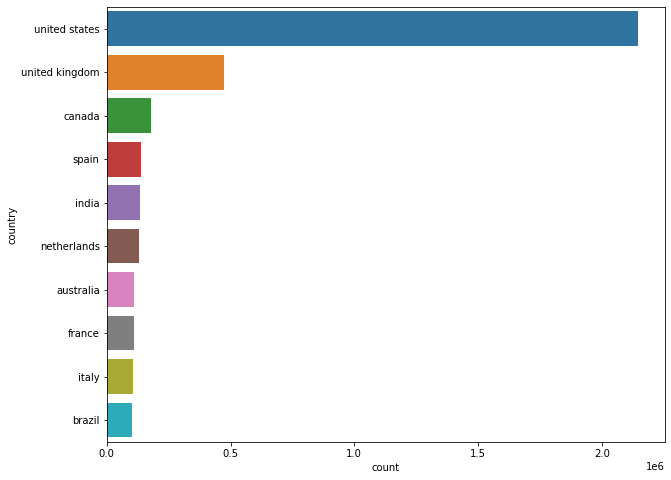

In [229]:
# Visualising the top countries with many companies
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='country', data = country_df.nlargest(10, 'count'))

Companies from united states have maximum number of companies

##### Linkedin URL

In [232]:
link_df = df['linkedin url'].value_counts().rename_axis('linkedin url').reset_index(name='count')
link_df

linkedin url  count
0                    linkedin.com/company/se-international      1
1                 linkedin.com/company/jason-l-gunter-p-a-      1
2        linkedin.com/company/griffin-properties-griffi...      1
3                   linkedin.com/company/rent-plus-limited      1
4                       linkedin.com/company/art-marketing      1
...                                                    ...    ...
6597893               linkedin.com/company/heystrategy-ltd      1
6597894  linkedin.com/company/protecting-kids-the-world...      1
6597895  linkedin.com/company/sublime-public-relations-inc      1
6597896           linkedin.com/company/ideal-incentive-inc      1
6597897               linkedin.com/company/compu-quote-inc      1

[6597898 rows x 2 columns]

As shown above, every company has its unique URL

##### Current employee estimste

In [234]:
emp_df = df['current employee estimate'].value_counts().rename_axis('current employee estimate').reset_index(name='count')
emp_df

current employee estimate    count
0                             1  2331718
1                             0  1179271
2                             2   926207
3                             3   473327
4                             4   292860
...                         ...      ...
4482                      10807        1
4483                       2611        1
4484                      13330        1
4485                       2608        1
4486                       4095        1

[4487 rows x 2 columns]

<AxesSubplot:xlabel='current employee estimate', ylabel='count'>

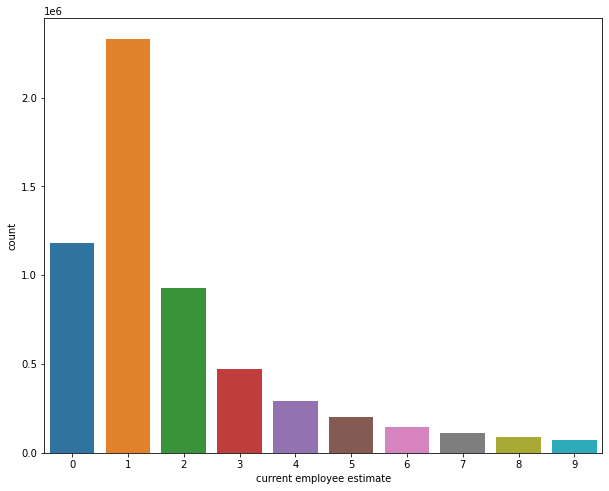

In [236]:
# Visualizing the employee estimate
plt.figure(figsize=(10, 8))
sns.barplot(x='current employee estimate', y='count', data = emp_df.nlargest(10, 'count'))

From the above visualization, there is some discordance with the 0 employees or the data might have been replaced with 0 for every null value.

### Feature Engineering

From the "locality" column, we can extract city which is useful to tackle the inconsistency discussed above in the univariate analysis of locality.

In [238]:
def extract_city(locality):
    if pd.isnull(locality):
        return '<NA>'
    # extract cities from locality
    geo = geotext.GeoText(locality).cities
    if len(geo) > 0:
        return geo[0]
    return locality.split(',')[0]

df['city'] = df['locality'].apply(extract_city)

From the "name" column we can extract different features like number of characters, words and punctuations. Another feature to be considered is word density. We can also identify if a name contains digits or non-aschii characters.

In [239]:
df['name_char_count'] = df['name'].apply(lambda name: len(name))

# split name based on comma, space or hyphen
df['name_word_count'] = df['name'].apply(lambda name: len(list(filter(lambda x: x!= '', re.split(r',|\s|-', name)))))

df['name_word_density'] = round(df['name_word_count'] / df['name_char_count'], 2)

punc = string.punctuation
df['name_punc_count'] = df['name'].apply(lambda x : len([a for a in x if a in punc]))

df['name_non_aschii_char_count'] = df['name'].apply(lambda x: len([a for a in x if ord(a) > 127]))

df['name_digit_count'] = df['name'].apply(lambda x: len([a for a in x if a in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']]))

Let's check the 'size range' and characterize size into numbers in another column

In [240]:
def label(size):
    shift={
        '1 - 10': 1,
        '11 - 50': 2,
        '51 - 200': 3,
        '201 - 500': 4,
        '501 - 1000': 5,
        '1001 - 5000': 6,
        '5001 - 10000': 7,
        '10001+': 8
    }
    return shift.get(size, 0)
df['size_category'] = df['size range'].apply(label)

In [243]:
df.head(10)

name                domain  year founded  \
1        tata consultancy services               tcs.com          1968   
4                               ey                ey.com          1989   
9                             at&t               att.com          1876   
17            jpmorgan chase & co.     jpmorganchase.com          1823   
18                         us navy              navy.com             0   
21                         siemens           siemens.com          1847   
30          mcdonald's corporation    aboutmcdonalds.com          1955   
35               kaiser permanente  kaiserpermanente.org          1945   
38  department of veterans affairs                va.gov          1930   
46                          pfizer            pfizer.com          1848   

                               industry size range  \
1   information technology and services     10001+   
4                            accounting     10001+   
9                    telecommunications     10001+   
17                   financial services     10001+   
18                             military     10001+   
21  electrical/electronic manufacturing     10001+   
30                          restaurants     10001+   
35               hospital & health care     10001+   
38            government administration     10001+   
46                      pharmaceuticals     10001+   

                                           locality         country  \
1                        bombay, maharashtra, india           india   
4            london, greater london, united kingdom  united kingdom   
9                      dallas, texas, united states   united states   
17                new york, new york, united states   united states   
18  washington, district of columbia, united states   united states   
21                         munich, bavaria, germany         germany   
30               oak brook, illinois, united states   united states   
35               oakland, california, united states   united states   
38  washington, district of columbia, united states   united states   
46                new york, new york, united states   united states   

                                         linkedin url  \
1      linkedin.com/company/tata-consultancy-services   
4                  linkedin.com/company/ernstandyoung   
9                           linkedin.com/company/at&t   
17                linkedin.com/company/jpmorgan-chase   
18                       linkedin.com/company/us-navy   
21                       linkedin.com/company/siemens   
30        linkedin.com/company/mcdonald's-corporation   
35             linkedin.com/company/kaiser-permanente   
38  linkedin.com/company/department-of-veterans-af...   
46                        linkedin.com/company/pfizer   

    current employee estimate  total employee estimate        city  \
1                      190771                   341369      bombay   
4                      158363                   428960      london   
9                      115188                   269659      dallas   
17                      95234                   242135    new york   
18                      94458                   325740  washington   
21                      87381                   240528      munich   
30                      68233                   235199   oak brook   
35                      65839                   105240     oakland   
38                      62685                    86489  washington   
46                      59588                   176364    new york   

    name_char_count  name_word_count  name_word_density  name_punc_count  \
1                25                3               0.12                0   
4                 2                1               0.50                0   
9                 4                1               0.25                1   
17               20                4               0.20                2   
18                7                2               0.29    

### Correlation with heatmap

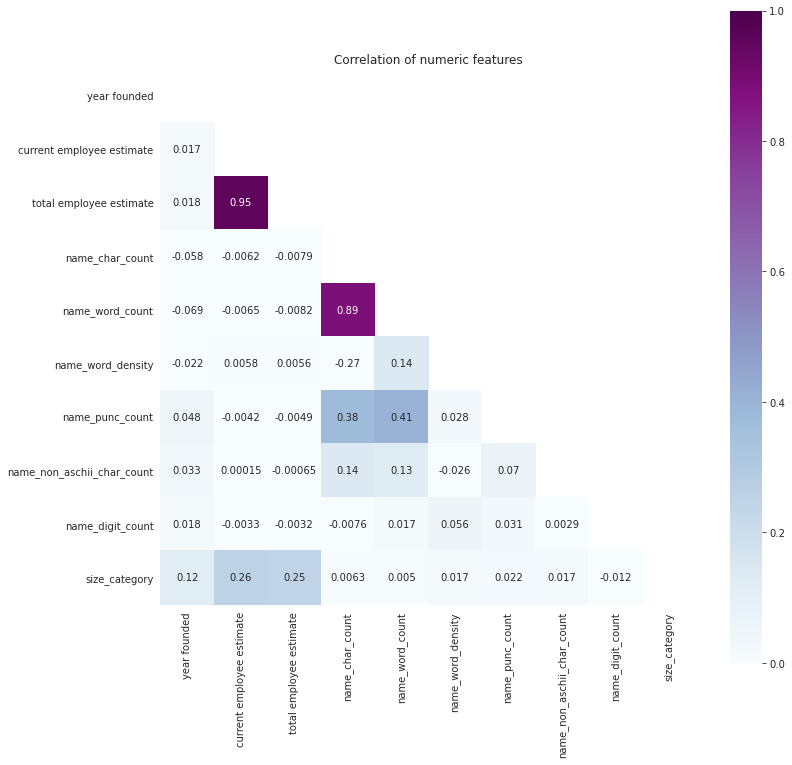

In [244]:
# Performing correlation
df_corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f_fig, f_ax = plt.subplots(figsize=(12, 12))
    f_ax = sns.heatmap(df_corr, mask=mask, vmin=0, vmax=1, square=True,
                        annot=True, annot_kws={"size": 10}, cmap="BuPu")
plt.title('Correlation of numeric features')
plt.show()

From the above scenario, it is evident that there is no significant correlation between the important numerical features.

Let's work on Bivariate Analysis

##### country and name_char_count

To examine the average number of characters in company names per countries

In [246]:
country_df = df.groupby('country', as_index=False).agg({'name_char_count': 'mean', 'name': 
'count'}).rename(columns={'name_char_count': 'mean_name_char', 'name': 'count'})
country_df =  country_df[country_df['count'] >= 100].sort_values(by='mean_name_char'
,ascending=False).reset_index(drop=True)
country_df['country'] = country_df['country'].astype('string').str.title()
country_df['mean_name_char'] = country_df['mean_name_char'].astype('int16')
country_df

country  mean_name_char   count
0                  China              28   35189
1    Trinidad And Tobago              27     461
2                  Yemen              27     113
3                  Sudan              26     299
4                 Kuwait              26    1669
..                   ...             ...     ...
160               Norway              16   24390
161               France              16  108366
162              Denmark              16   27671
163              Iceland              16     965
164              Estonia              15    3130

[165 rows x 3 columns]

In [247]:
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))[['name', 'geometry']]
gdf.columns = ['country', 'geometry']
gdf.head()

country                                           geometry
0                      Fiji  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1                  Tanzania  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2                 W. Sahara  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3                    Canada  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4  United States of America  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [248]:
# remove antarctica
antarctic_index = int(gdf[gdf['country'] == 'Antarctica'].index.values)
gdf = gdf.drop(gdf.index[antarctic_index])

replace = {
    "United States of America": 'United States',
    "Bosnia and Herz.": 'Bosnia And Herzegovina',
    "Central African Rep.": 'Central African Republic',
    "Côte d'Ivoire": 'Côte D’Ivoire',
    "Dominican Rep.": 'Dominican Republic',
    "Dem. Rep. Congo": 'Democratic Republic Of The Congo',
    "Eq. Guinea": 'Equatorial Guinea',
    "Dominican Rep.": 'Dominican Republic',
    "Solomon Is.": 'Solomon Islands',
    "Trinidad and Tobago": 'Trinidad And Tobago',
    "S. Sudan": 'South Sudan',
}

for (n_old, n_new) in replace.items():  
    gdf.country.loc[gdf['country'] == n_old] = n_new

# merge country_df and gdf
merged = gdf.merge(country_df, left_on='country', right_on='country', how = 'left')
merged.head()

/Users/tavleensodhi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


country                                           geometry  \
0           Fiji  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
1       Tanzania  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
2      W. Sahara  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...   
3         Canada  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
4  United States  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   

   mean_name_char      count  
0            25.0     1252.0  
1            22.0     1031.0  
2             NaN        NaN  
3            22.0   177528.0  
4            21.0  2145990.0

In [250]:
#! pip install mapclassify

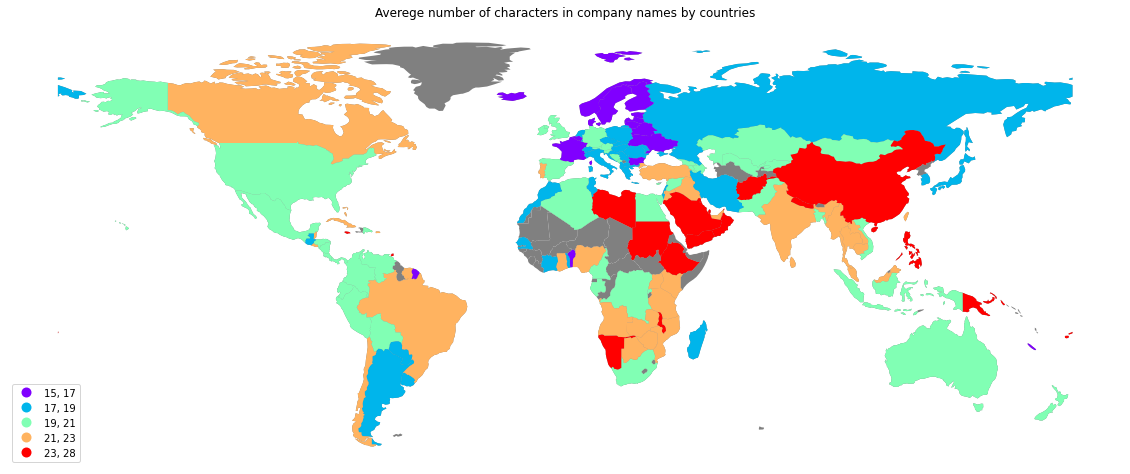

In [251]:
import mapclassify
fig, ax = plt.subplots(1, figsize=(20,15))

merged.plot(color='grey', ax=ax, label = 'No data')
merged.dropna().plot(column='mean_name_char', cmap='rainbow', ax=ax, scheme='natural_breaks', k=5, legend=True, legend_kwds={'loc': 'lower left'})

plt.title('Averege number of characters in company names by countries')

#fixing floating-point counts, making them integer:
leg = ax.get_legend()
for text in leg.get_texts():
    text.set_text(text.get_text().replace('.00', ''))

plt.axis('off');

### country and name_word_count

In [253]:
country_df = df.groupby('country', as_index=False).agg({'name_word_count': 'mean', 'name': 'count'}).rename(columns={'name_word_count': 'mean_name_word', 'name': 'count'})
country_df =  country_df[country_df['count'] >= 100].sort_values(by='mean_name_word',ascending=False).reset_index(drop=True)
country_df['country'] = country_df['country'].astype('string').str.title()
country_df['mean_name_word'] = country_df['mean_name_word'].astype('int16')
country_df

country  mean_name_word   count
0      China               4   35189
1      Yemen               3     113
2       Oman               3    1277
3     Kuwait               3    1669
4      Sudan               3     299
..       ...             ...     ...
160   France               2  108366
161  Estonia               2    3130
162  Denmark               2   27671
163  Belarus               2     984
164  Iceland               2     965

[165 rows x 3 columns]

In [254]:
# merge country_df and gdf
merged = gdf.merge(country_df, left_on='country', right_on='country', how = 'left')
merged.head()

country                                           geometry  \
0           Fiji  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
1       Tanzania  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
2      W. Sahara  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...   
3         Canada  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
4  United States  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   

   mean_name_word      count  
0             3.0     1252.0  
1             3.0     1031.0  
2             NaN        NaN  
3             3.0   177528.0  
4             3.0  2145990.0

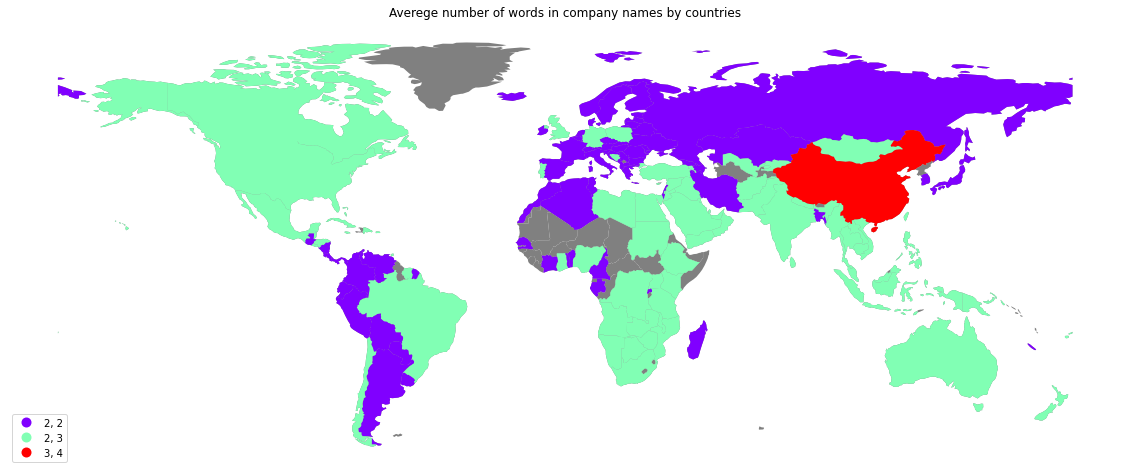

In [255]:
fig, ax = plt.subplots(1, figsize=(20,15))

merged.plot(color='grey', ax=ax, label = 'No data')
merged.dropna().plot(column='mean_name_word', cmap='rainbow', ax=ax, scheme='natural_breaks', k=3, legend=True, legend_kwds={'loc': 'lower left'})

plt.title('Averege number of words in company names by countries')

#fixing floating-point counts, making them integer:
leg = ax.get_legend()
for text in leg.get_texts():
    text.set_text(text.get_text().replace('.00', ''))

plt.axis('off');


There is high similarity with the map showing averege number of characters in company names by countries. It is obvious as there is a correlation between number of characters and words. Some countries with high average number of characters have medium average number of words. Hence, we can assume the words used by these countries are longer.

##### country and name_punc_count

Let's investigate average number of punctuations with the country

In [256]:
country_df = df.groupby('country', as_index=False).agg({'name_punc_count': 'mean', 'name': 'count'}).rename(columns={'name_punc_count': 'mean_name_punct_count', 'name': 'count'})
country_df =  country_df[country_df['count'] >= 100].sort_values(by='mean_name_punct_count',ascending=False).reset_index(drop=True)
country_df['country'] = country_df['country'].astype('string').str.title()
country_df['mean_name_punct_count'] = country_df['mean_name_punct_count'].round(2)
country_df

country  mean_name_punct_count   count
0           Czechia                   1.59   12085
1          Slovenia                   1.49    3098
2          Slovakia                   1.48    4017
3             China                   1.36   35189
4           Croatia                   1.20    4448
..              ...                    ...     ...
160       Australia                   0.21  108841
161  United Kingdom                   0.20  473653
162         Estonia                   0.20    3130
163          Norway                   0.19   24390
164          Sweden                   0.16   33329

[165 rows x 3 columns]

In [257]:
# merge country_df and gdf
merged = gdf.merge(country_df, left_on='country', right_on='country', how = 'left')
merged.head()

country                                           geometry  \
0           Fiji  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
1       Tanzania  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
2      W. Sahara  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...   
3         Canada  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
4  United States  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   

   mean_name_punct_count      count  
0                   0.57     1252.0  
1                   0.37     1031.0  
2                    NaN        NaN  
3                   0.48   177528.0  
4                   0.42  2145990.0

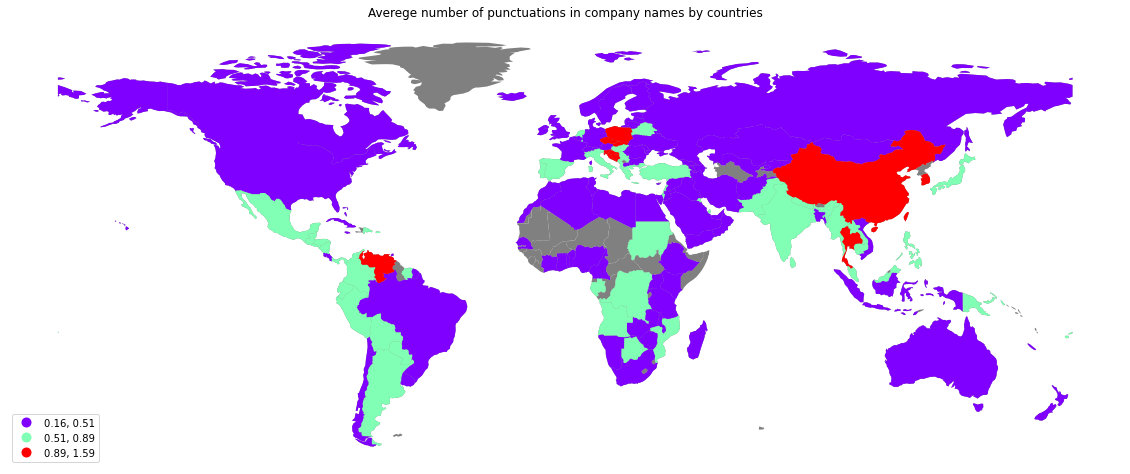

In [258]:
fig, ax = plt.subplots(1, figsize=(20,15))

merged.plot(color='grey', ax=ax, label = 'No data')
merged.dropna().plot(column='mean_name_punct_count', cmap='rainbow', ax=ax, scheme='natural_breaks', k=3, legend=True, legend_kwds={'loc': 'lower left'})

plt.title('Averege number of punctuations in company names by countries')

#fixing floating-point counts, making them integer:
leg = ax.get_legend()
for text in leg.get_texts():
    text.set_text(text.get_text().replace('.00', ''))

plt.axis('off');

some companies in Europe, south america and south asia use punctuation. We will do the analysis of those countries

In [259]:
country_df[country_df['mean_name_punct_count'] >= 1]

country  mean_name_punct_count  count
0                 Czechia                   1.59  12085
1                Slovenia                   1.49   3098
2                Slovakia                   1.48   4017
3                   China                   1.36  35189
4                 Croatia                   1.20   4448
5               Venezuela                   1.06   3745
6                Thailand                   1.04   5398
7                  Taiwan                   1.04   3301
8  Bosnia And Herzegovina                   1.02    945

##### country and name_digit_count

Digits are not that much common in company name. But they appear in some names to represent something, for example, the year they were founded. Let's see if there is a relation between country and average number of digits in company names.

In [261]:
country_df = df.groupby('country', as_index=False).agg({'name_digit_count': 'mean', 'name': 'count'}).rename(columns={'name_digit_count': 'mean_name_digit_count', 'name': 'count'})
country_df =  country_df[country_df['count'] >= 100].sort_values(by='mean_name_digit_count',ascending=False).reset_index(drop=True)
country_df['country'] = country_df['country'].astype('string').str.title()
country_df['mean_name_digit_count'] = country_df['mean_name_digit_count'].round(2)
country_df

country  mean_name_digit_count  count
0         Taiwan                   0.15   3301
1     Guadeloupe                   0.12    165
2    South Korea                   0.11   2047
3      Venezuela                   0.10   3745
4        Albania                   0.08    735
..           ...                    ...    ...
160         Oman                   0.01   1277
161         Iraq                   0.01    735
162      Bahamas                   0.00    290
163   Seychelles                   0.00    127
164        Yemen                   0.00    113

[165 rows x 3 columns]

The maximum value for average count of digits per country is 0.15 which is very low. This is expected as most company names doesn't include digits.

In [262]:
# merge country_df and gdf
merged = gdf.merge(country_df, left_on='country', right_on='country', how = 'left')
merged.head()

country                                           geometry  \
0           Fiji  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
1       Tanzania  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
2      W. Sahara  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...   
3         Canada  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
4  United States  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   

   mean_name_digit_count      count  
0                   0.02     1252.0  
1                   0.04     1031.0  
2                    NaN        NaN  
3                   0.05   177528.0  
4                   0.04  2145990.0

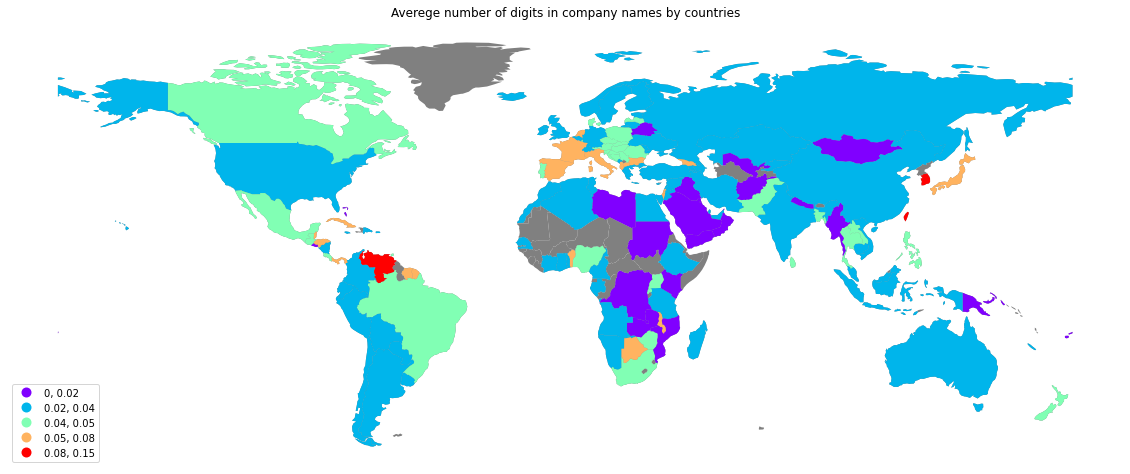

In [263]:
fig, ax = plt.subplots(1, figsize=(20,15))

merged.plot(color='grey', ax=ax, label = 'No data')
merged.dropna().plot(column='mean_name_digit_count', cmap='rainbow', ax=ax, scheme='natural_breaks', k=5, legend=True, legend_kwds={'loc': 'lower left'})

plt.title('Averege number of digits in company names by countries')

#fixing floating-point counts, making them integer:
leg = ax.get_legend()
for text in leg.get_texts():
    text.set_text(text.get_text().replace('.00', ''))

plt.axis('off');

In [264]:
country_df[country_df['mean_name_digit_count'] > 0.07]

country  mean_name_digit_count  count
0       Taiwan                   0.15   3301
1   Guadeloupe                   0.12    165
2  South Korea                   0.11   2047
3    Venezuela                   0.10   3745
4      Albania                   0.08    735
5      Curaçao                   0.08    239

##### country and name_non_aschii_char_count

Company names with non-aschii characters are probably going to be from non-english speaking countries. But the question is which countries have the highest number of average non-aschii characters. Let's find out.

In [265]:
country_df = df.groupby('country', as_index=False).agg({'name_non_aschii_char_count': 'mean', 'name': 'count'}).rename(columns={'name_non_aschii_char_count': 'mean_name_non_aschii_char_count', 'name': 'count'})
country_df =  country_df[country_df['count'] >= 100].sort_values(by='mean_name_non_aschii_char_count',ascending=False).reset_index(drop=True)
country_df['country'] = country_df['country'].astype('string').str.title()
country_df['mean_name_non_aschii_char_count'] = country_df['mean_name_non_aschii_char_count'].round(2)
country_df

country  mean_name_non_aschii_char_count  count
0       Belarus                             1.33    984
1        Russia                             1.14  11164
2        Turkey                             1.13  33898
3          Iran                             1.02   6864
4    Kazakhstan                             0.97    902
..          ...                              ...    ...
160     Bahamas                             0.00    290
161    Tanzania                             0.00   1031
162      Zambia                             0.00    466
163    Botswana                             0.00    289
164      Belize                             0.00    211

[165 rows x 3 columns]

In [266]:
# merge country_df and gdf
merged = gdf.merge(country_df, left_on='country', right_on='country', how = 'left')
merged.head()

country                                           geometry  \
0           Fiji  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
1       Tanzania  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
2      W. Sahara  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...   
3         Canada  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
4  United States  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   

   mean_name_non_aschii_char_count      count  
0                             0.19     1252.0  
1                             0.00     1031.0  
2                              NaN        NaN  
3                             0.07   177528.0  
4                             0.01  2145990.0

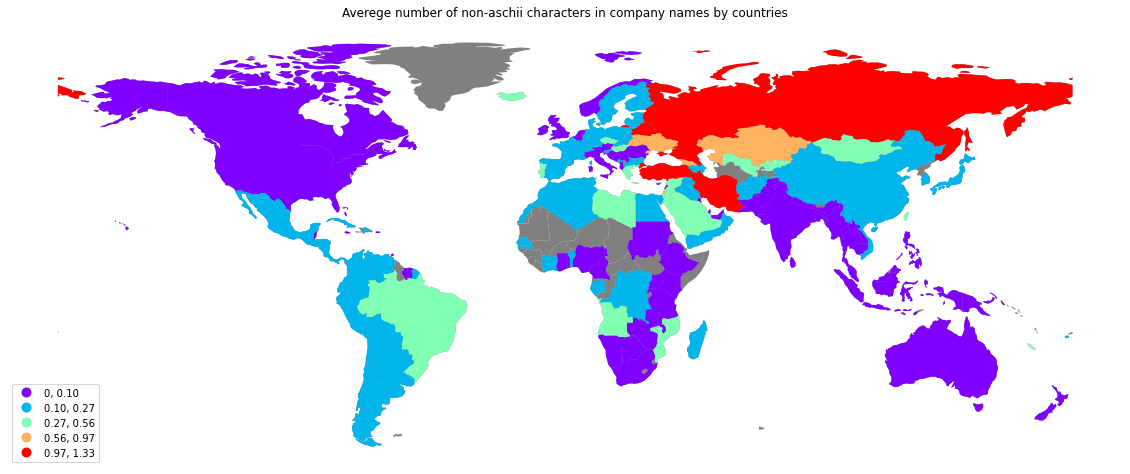

In [267]:
fig, ax = plt.subplots(1, figsize=(20,15))

merged.plot(color='grey', ax=ax, label = 'No data')
merged.dropna().plot(column='mean_name_non_aschii_char_count', cmap='rainbow', ax=ax, scheme='natural_breaks', k=5, legend=True, legend_kwds={'loc': 'lower left'})

plt.title('Averege number of non-aschii characters in company names by countries')

#fixing floating-point counts, making them integer:
leg = ax.get_legend()
for text in leg.get_texts():
    text.set_text(text.get_text().replace('.00', ''))

plt.axis('off');


In [270]:
country_df[country_df['mean_name_non_aschii_char_count'] >= 0.97]

country  mean_name_non_aschii_char_count  count
0     Belarus                             1.33    984
1      Russia                             1.14  11164
2      Turkey                             1.13  33898
3        Iran                             1.02   6864
4  Kazakhstan                             0.97    902

##### country and size range

In [272]:
country_df = df.groupby('country', as_index=False).agg({'size_category': 'mean', 'name': 'count'}).rename(columns={'size_category': 'mean_size_category', 'name': 'count'})
country_df =  country_df[country_df['count'] >= 100].sort_values(by='mean_size_category',ascending=False).reset_index(drop=True)
country_df['country'] = country_df['country'].astype('string').str.title()
country_df['mean_size_category'] = country_df['mean_size_category'].round(2)
country_df

country  mean_size_category    count
0    Papua New Guinea                1.82      222
1               Qatar                1.81     2208
2        Saudi Arabia                1.81     6778
3           Indonesia                1.74    14402
4                Oman                1.73     1277
..                ...                 ...      ...
160     United States                1.27  2145990
161        Martinique                1.26      141
162        Guadeloupe                1.25      165
163    United Kingdom                1.22   473653
164       Saint Lucia                1.21      307

[165 rows x 3 columns]

In [273]:
# merge country_df and gdf
merged = gdf.merge(country_df, left_on='country', right_on='country', how = 'left')
merged.head()

country                                           geometry  \
0           Fiji  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
1       Tanzania  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
2      W. Sahara  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...   
3         Canada  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
4  United States  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   

   mean_size_category      count  
0                1.68     1252.0  
1                1.51     1031.0  
2                 NaN        NaN  
3                1.33   177528.0  
4                1.27  2145990.0

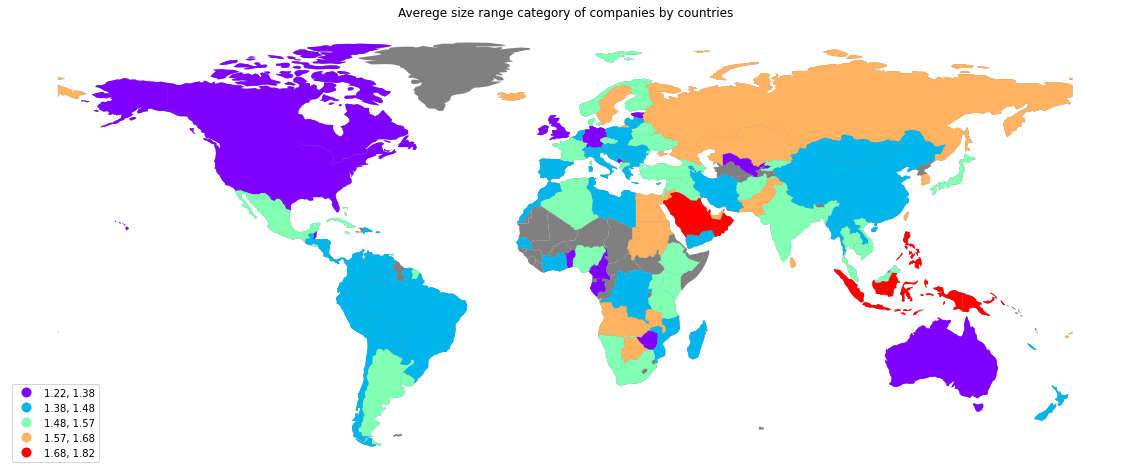

In [274]:
fig, ax = plt.subplots(1, figsize=(20,15))

merged.plot(color='grey', ax=ax, label = 'No data')
merged.dropna().plot(column='mean_size_category', cmap='rainbow', ax=ax, scheme='natural_breaks', k=5, legend=True, legend_kwds={'loc': 'lower left'})

plt.title('Averege size range category of companies by countries')

#fixing floating-point counts, making them integer:
leg = ax.get_legend()
for text in leg.get_texts():
    text.set_text(text.get_text().replace('.00', ''))

plt.axis('off');

The mean size category ranges from 1.23 to 1.88 in every country with more than or equal to 100 companies in the dataset. This indicates that there are many small companies in these countries which is obvious. That is why the average is lower.

##### name and industry

Here we will examine how many and which companies contain words from their respective industries in their names.

In [277]:
def industry_in_name(row):
    puncs = [punc for punc in string.punctuation]
    puncs.append('and')
    industry_words = set(filter(lambda x: x not in puncs, re.split(r'\s|-', row['industry'])))
    name_words = re.split(r'\s|-', row['name'])
    return len([i for i in name_words if i in industry_words])
df['industry_word_in_name_count'] = df.apply(industry_in_name, axis=1)

In [278]:
name_industry_df = df[df['industry_word_in_name_count'] > 0]
name_industry_df

name                    domain  \
1              tata consultancy services                   tcs.com   
136          nyc department of education                   nyc.gov   
211       social security administration        socialsecurity.gov   
240                       lg electronics                    lg.com   
260              alberta health services  albertahealthservices.ca   
...                                  ...                       ...   
7173386   agile4ever consulting services            agile4ever.com   
7173398      grund chiropractic wellness                       NaN   
7173405  nextmotion mobility engineering             nextmotion.pt   
7173413    a w hargrove insurance agency                       NaN   
7173418            koop media management                       NaN   

         year founded                              industry size range  \
1                1968   information technology and services     10001+   
136                 0                  education management     10001+   
211              1935             government administration     10001+   
240              1947                  consumer electronics     10001+   
260              2008                hospital & health care     10001+   
...               ...                                   ...        ...   
7173386          2013                 management consulting     1 - 10   
7173398             0          health, wellness and fitness     1 - 10   
7173405          2012  mechanical or industrial engineering     1 - 10   
7173413             0                             insurance     1 - 10   
7173418             0                       broadcast media     1 - 10   

                                       locality         country  \
1                    bombay, maharashtra, india           india   
136           new york, new york, united states   united states   
211          baltimore, maryland, united states   united states   
240        seoul, seoul-t'ukpyolsi, south korea     south korea   
260                   edmonton, alberta, canada          canada   
...                                         ...             ...   
7173386  london, greater london, united kingdom  united kingdom   
7173398   santa rosa, california, united states   united states   
7173405                                     NaN             NaN   
7173413         exmore, virginia, united states   united states   
7173418                                     NaN             NaN   

                                              linkedin url  \
1           linkedin.com/company/tata-consultancy-services   
136       linkedin.com/company/nyc-department-of-education   
211                               linkedin.com/company/ssa   
240                    linkedin.com/company/lg-electronics   
260           linkedin.com/company/alberta-health-services   
...                                                    ...   
7173386  linkedin.com/company/agile4ever-consulting-ser...   
7173398   linkedin.com/company/grund-chiropractic-wellness   
7173405                    linkedin.com/company/nextmotion   
7173413  linkedin.com/company/a-w-hargrove-insurance-ag...   
7173418         linkedin.com/company/koop-media-management   

         current employee estimate  total employee estimate        city  \
1                           190771                   341369      bombay   
136                          30526                    45049    new york   
211                          21150                    28143   baltimore   
240                          19552                    47846       seoul   
260                          18502                    24861    edmonton   
...                            ...                      ...         ...   
7173386                          0                        2      london   
7173398                          0                        1  santa rosa   
7173405                          0                        1        <NA>   
717341

Let's explore these companies with respect to their country, size range, industry and year founded.

In [279]:
country_df = name_industry_df.groupby('country', as_index=False).agg({'name': 'count'}).rename(columns={'name': 'count'})
country_df =  country_df.sort_values(by='count',ascending=False).reset_index(drop=True)
country_counts_df = df['country'].value_counts().rename_axis('country').reset_index(name='total_count')
country_df = country_df.merge(country_counts_df, left_on='country', right_on='country', how = 'left')
country_df['country'] = country_df['country'].astype('string').str.title()
country_df

country   count  total_count
0          United States  241972      2145990
1         United Kingdom   49553       473653
2                 Canada   22339       177528
3                  India   13845       135951
4              Australia   12954       108841
..                   ...     ...          ...
213           Micronesia       1            5
214  U.S. Virgin Islands       1            1
215               Tuvalu       1           23
216               Guyana       1           48
217                Samoa       1           23

[218 rows x 3 columns]

In [280]:
# merge country_df and gdf
merged = gdf.merge(country_df, left_on='country', right_on='country', how = 'left')
merged.head()

country                                           geometry     count  \
0           Fiji  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...     154.0   
1       Tanzania  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...     109.0   
2      W. Sahara  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...       NaN   
3         Canada  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   22339.0   
4  United States  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  241972.0   

   total_count  
0       1252.0  
1       1031.0  
2          NaN  
3     177528.0  
4    2145990.0

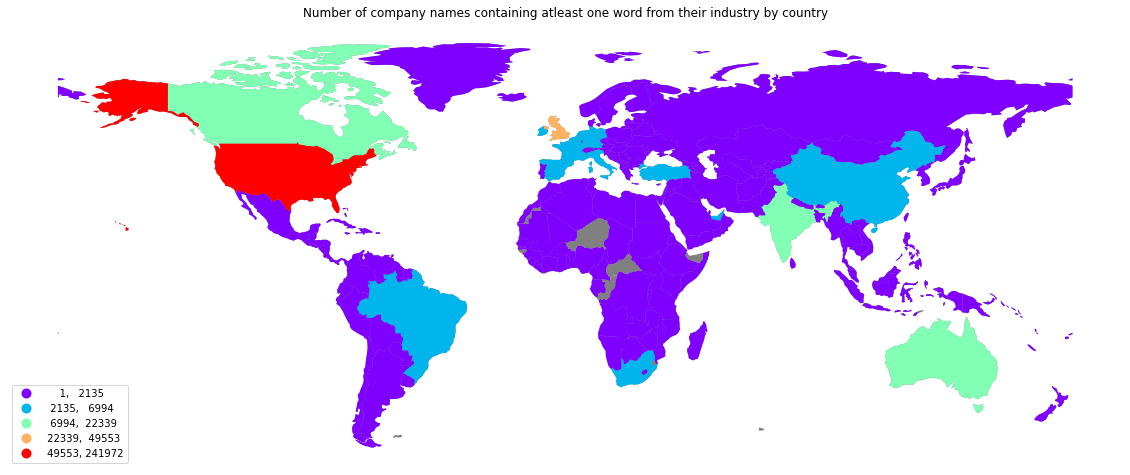

In [281]:
fig, ax = plt.subplots(1, figsize=(20,15))

merged.plot(color='grey', ax=ax, label = 'No data')
merged.dropna().plot(column='count', cmap='rainbow', ax=ax, scheme='natural_breaks', k=5, legend=True, legend_kwds={'loc': 'lower left'})

plt.title('Number of company names containing atleast one word from their industry by country')

#fixing floating-point counts, making them integer:
leg = ax.get_legend()
for text in leg.get_texts():
    text.set_text(text.get_text().replace('.00', ''))

plt.axis('off');


The united states dominates here. But this maybe due to its high number of companies in the dataset as compared to other companies.

##### industry_word_in_name_count and size range

Let us check if these names are related to size range.

In [282]:
size_df = name_industry_df.groupby('size range', as_index=False).agg({'name': 'count'}).rename(columns={'name': 'count'})
size_counts_df = df['size range'].value_counts().rename_axis('size range').reset_index(name='total_count')
size_df = size_df.merge(size_counts_df, left_on='size range', right_on='size range', how = 'left')
size_df =  size_df.sort_values(by='count',ascending=False).reset_index(drop=True)
size_df

size range   count  total_count
0        1 - 10  473407      5123116
1       11 - 50   96017      1065971
2      51 - 200   25381       294242
3     201 - 500    5862        67694
4    501 - 1000    2078        23581
5   1001 - 5000    1769        19721
6  5001 - 10000     216         2259
7        10001+     107         1314

##### industry_word_in_name_count and industry

In [283]:
industry_df = name_industry_df.groupby('industry', as_index=False).agg({'name': 'count'}).rename(columns={'name': 'count'})
industry_counts_df = df['industry'].value_counts().rename_axis('industry').reset_index(name='total_count')
industry_df = industry_df.merge(industry_counts_df, left_on='industry', right_on='industry', how = 'left')
industry_df =  industry_df.sort_values(by='count',ascending=False).reset_index(drop=True)
industry_df

industry  count  total_count
0              marketing and advertising  41213       319589
1                  management consulting  31947       185604
2                           construction  27745       250232
3                 hospital & health care  25578       135031
4    information technology and services  25471       428200
..                                   ...    ...          ...
141                         supermarkets     23         2752
142                              fishery     21         2295
143                            judiciary     12         3782
144                             ranching      3         2272
145               outsourcing/offshoring      1        13196

[146 rows x 3 columns]

In [284]:
industry_df.head(10)

industry  count  total_count
0            marketing and advertising  41213       319589
1                management consulting  31947       185604
2                         construction  27745       250232
3               hospital & health care  25578       135031
4  information technology and services  25471       428200
5                            insurance  22927        67604
6                               design  21723       114594
7                   financial services  21435       162110
8                          real estate  20435       185008
9                         law practice  20380        79045

<AxesSubplot:xlabel='count', ylabel='industry'>

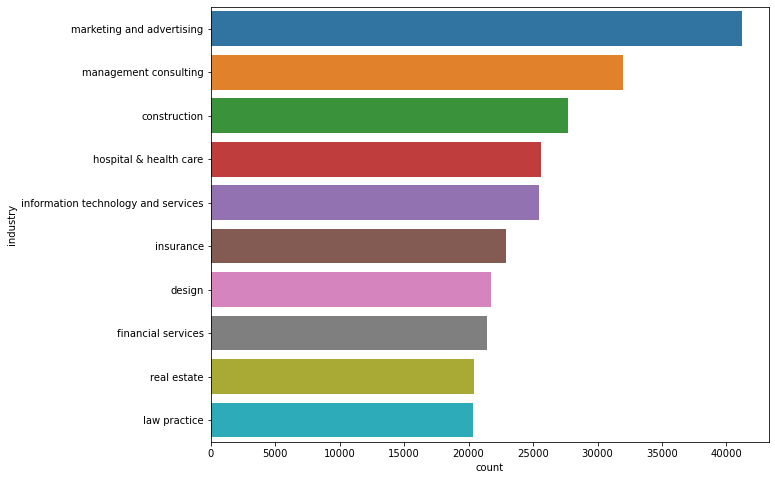

In [285]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='industry', data = industry_df.nlargest(10, 'count'))

The bar chart plotted above shows top 10 industries with words from their respective industry in their company names.



##### industry_word_in_name_count and year founded

In [287]:
year_df = name_industry_df.groupby('year founded', as_index=False).agg({'name': 'count'}).rename(columns={'name': 'count'})
year_df = year_df[year_df['year founded'] != 0]
year_counts_df = df['year founded'].value_counts().rename_axis('year founded').reset_index(name='total_count')
year_df = year_df.merge(year_counts_df, left_on='year founded', right_on='year founded', how = 'left')
year_df =  year_df.sort_values(by='count',ascending=False).reset_index(drop=True)
year_df['year founded'] = year_df['year founded'].astype('string')
year_df

year founded  count  total_count
0           2010  20428       197100
1           2014  19778       223763
2           2013  19455       214206
3           2015  19411       225321
4           2012  18938       204219
..           ...    ...          ...
212         1825      2           70
213         1815      2           56
214         1811      1           56
215         1827      1           59
216         1829      1           80

[217 rows x 3 columns]

In [288]:
year_df.head(10)

year founded  count  total_count
0         2010  20428       197100
1         2014  19778       223763
2         2013  19455       214206
3         2015  19411       225321
4         2012  18938       204219
5         2011  17666       181481
6         2009  17610       164896
7         2016  17219       196849
8         2008  13551       130014
9         2017  12524       134877

<AxesSubplot:xlabel='count', ylabel='year founded'>

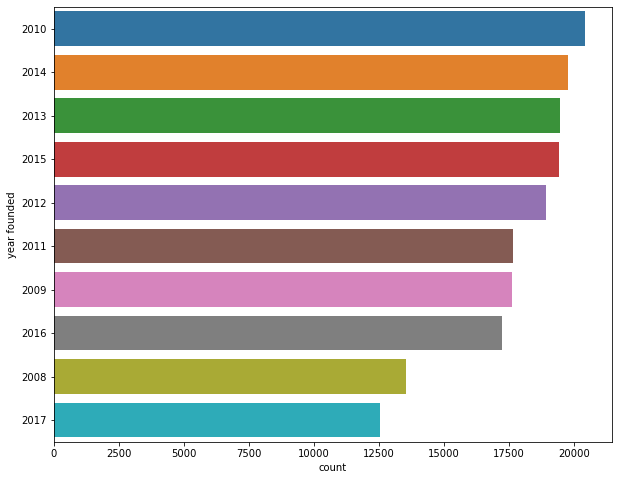

In [289]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='year founded', data = year_df.nlargest(10, 'count'))

##### name and locality

Here we will examine how many and which companies contain words from their respective localities in their names.

In [291]:
def locality_in_name(row):
    if pd.isnull(row['locality']):
        return np.nan
    puncs = [punc for punc in string.punctuation]
    puncs.append('and')
    locality_words = set(filter(lambda x: x not in puncs, re.split(r'\s|-', row['locality'])))
    name_words = re.split(r'\s|-', row['name'])
    return len([i for i in name_words if i in locality_words])
df['locality_word_in_name_count'] = df.apply(locality_in_name, axis=1)

In [292]:
name_locality_df = df[df['locality_word_in_name_count'] > 0]
name_locality_df

name                    domain  \
38            department of veterans affairs                    va.gov   
160                             saudi aramco           saudiaramco.com   
174      united states department of defense               defense.gov   
225      los angeles unified school district                 lausd.net   
239                                 emirates              emirates.com   
...                                      ...                       ...   
7173163                     new york telecom                       NaN   
7173176    ladies & gentlemen - south africa  ladiesandgentlemen.co.za   
7173189   saudi speciality chemicals company                       NaN   
7173208                   iran model company             iranmodel.com   
7173370                         cia do movel     emporiodomovel.com.br   

         year founded                              industry size range  \
38               1930             government administration     10001+   
160              1933                          oil & energy     10001+   
174              1947                              military     10001+   
225              1853                  education management     10001+   
239              1985                     airlines/aviation     10001+   
...               ...                                   ...        ...   
7173163             0                    telecommunications     1 - 10   
7173176          2011                      media production     1 - 10   
7173189             0                             chemicals     1 - 10   
7173208          1984  mechanical or industrial engineering     1 - 10   
7173370          2002                             furniture     1 - 10   

                                                locality  \
38       washington, district of columbia, united states   
160              dhahran, eastern province, saudi arabia   
174      washington, district of columbia, united states   
225               los angeles, california, united states   
239                   dubai, dubai, united arab emirates   
...                                                  ...   
7173163               hoboken, new jersey, united states   
7173176              johannesburg, gauteng, south africa   
7173189           jubail, eastern province, saudi arabia   
7173208                             tehran, tehrān, iran   
7173370             igrejinha, rio grande do sul, brazil   

                      country  \
38              united states   
160              saudi arabia   
174             united states   
225             united states   
239      united arab emirates   
...                       ...   
7173163         united states   
7173176          south africa   
7173189          saudi arabia   
7173208                  iran   
7173370                brazil   

                                              linkedin url  \
38       linkedin.com/company/department-of-veterans-af...   
160                      linkedin.com/company/saudi-aramco   
174      linkedin.com/company/united-states-department-...   
225      linkedin.com/company/los-angeles-unified-schoo...   
239                          linkedin.com/company/emirates   
...                                                    ...   
7173163              linkedin.com/company/new-york-telecom   
7173176  linkedin.com/company/ladies-&-gentlemen---sout...   
7173189  linkedin.com/company/saudi-speciality-chemical...   
7173208            linkedin.com/company/iran-model-company   
7173370              linkedin.com/company/empório-do-móvel   

         current employee estimate  total employee estimate          city  \
38                           62685                    86489    washington   
160                          27631                    40870       dhahran   
174                          26000                    50520    washington   
225                          20404                    30115   los angeles   
239           

Let's explore these companies with respect to their country, size range, industry and year founded.

##### locality_word_in_name_count and country

In [294]:
country_df = name_locality_df.groupby('country', as_index=False).agg({'name': 'count'}).rename(columns={'name': 'count'})
country_df =  country_df.sort_values(by='count',ascending=False).reset_index(drop=True)
country_counts_df = df['country'].value_counts().rename_axis('country').reset_index(name='total_count')
country_df = country_df.merge(country_counts_df, left_on='country', right_on='country', how = 'left')
country_df['country'] = country_df['country'].astype('string').str.title()
country_df

country  count  total_count
0       United States  44193      2145990
1               India  19361       135951
2           Australia   6607       108841
3              Canada   6119       177528
4              France   6096       108366
..                ...    ...          ...
201          Kiribati      1           60
202        Kyrgyzstan      1          105
203  Marshall Islands      1           18
204        Micronesia      1            5
205     Åland Islands      1           47

[206 rows x 3 columns]

In [295]:
# merge country_df and gdf
merged = gdf.merge(country_df, left_on='country', right_on='country', how = 'left')
merged.head()

country                                           geometry    count  \
0           Fiji  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...    161.0   
1       Tanzania  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...    207.0   
2      W. Sahara  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...      NaN   
3         Canada  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   6119.0   
4  United States  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  44193.0   

   total_count  
0       1252.0  
1       1031.0  
2          NaN  
3     177528.0  
4    2145990.0

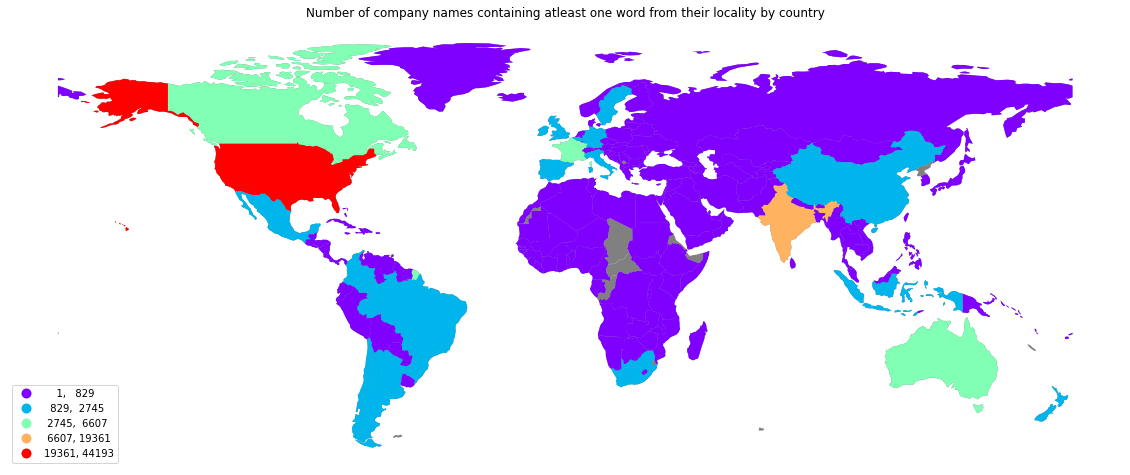

In [296]:
fig, ax = plt.subplots(1, figsize=(20,15))

merged.plot(color='grey', ax=ax, label = 'No data')
merged.dropna().plot(column='count', cmap='rainbow', ax=ax, scheme='natural_breaks', k=5, legend=True, legend_kwds={'loc': 'lower left'})

plt.title('Number of company names containing atleast one word from their locality by country')

#fixing floating-point counts, making them integer:
leg = ax.get_legend()
for text in leg.get_texts():
    text.set_text(text.get_text().replace('.00', ''))

plt.axis('off');

locality_word_in_name_count and size range

In [297]:
size_df = name_locality_df.groupby('size range', as_index=False).agg({'name': 'count'}).rename(columns={'name': 'count'})
size_counts_df = df['size range'].value_counts().rename_axis('size range').reset_index(name='total_count')
size_df = size_df.merge(size_counts_df, left_on='size range', right_on='size range', how = 'left')
size_df =  size_df.sort_values(by='count',ascending=False).reset_index(drop=True)
size_df

size range  count  total_count
0        1 - 10  91297      5123116
1       11 - 50  28301      1065971
2      51 - 200  10534       294242
3     201 - 500   2966        67694
4    501 - 1000   1218        23581
5   1001 - 5000   1107        19721
6  5001 - 10000    131         2259
7        10001+     80         1314

As we can see from the result above, small sized companies tend to have more companies with names conataining atleast a word from their respective localities. This aligns with the general distibution of size range. So I don't think there is a special connection here.

##### locality_word_in_name_count and industry



In [300]:
industry_df = name_locality_df.groupby('industry', as_index=False).agg({'name': 'count'}).rename(columns={'name': 'count'})
industry_counts_df = df['industry'].value_counts().rename_axis('industry').reset_index(name='total_count')
industry_df = industry_df.merge(industry_counts_df, left_on='industry', right_on='industry', how = 'left')
industry_df =  industry_df.sort_values(by='count',ascending=False).reset_index(drop=True)
industry_df

industry  count  total_count
0    information technology and services   6659       428200
1     non-profit organization management   5893        94613
2                   education management   5399       130623
3                 hospital & health care   4269       135031
4              marketing and advertising   4067       319589
..                                   ...    ...          ...
143                             ranching     39         2272
144                              tobacco     38         1324
145                         supermarkets     37         2752
146                       nanotechnology     33         2441
147                   legislative office     21          499

[148 rows x 3 columns]

In [301]:
industry_df.head(10)

industry  count  total_count
0  information technology and services   6659       428200
1   non-profit organization management   5893        94613
2                 education management   5399       130623
3               hospital & health care   4269       135031
4            marketing and advertising   4067       319589
5                          hospitality   3712        94887
6                          real estate   3659       185008
7                         construction   3158       250232
8         health, wellness and fitness   2910       140587
9                           automotive   2852       100759

<AxesSubplot:xlabel='count', ylabel='industry'>

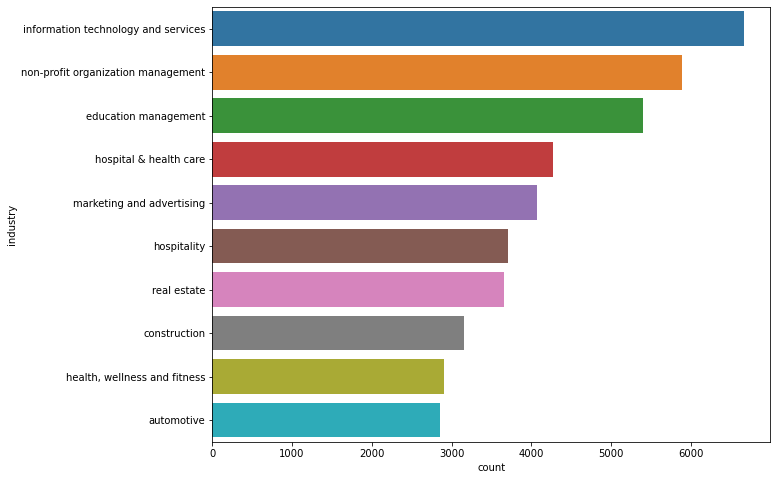

In [303]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='industry', data = industry_df.nlargest(10, 'count'))

The bar chart plotted above shows top 10 industries with words from their respective locality in their company names.



##### locality_word_in_name_count and year founded

In [305]:
year_df = name_locality_df.groupby('year founded', as_index=False).agg({'name': 'count'}).rename(columns={'name': 'count'})
year_df = year_df[year_df['year founded'] != 0]
year_counts_df = df['year founded'].value_counts().rename_axis('year founded').reset_index(name='total_count')
year_df = year_df.merge(year_counts_df, left_on='year founded', right_on='year founded', how = 'left')
year_df =  year_df.sort_values(by='count',ascending=False).reset_index(drop=True)
year_df['year founded'] = year_df['year founded'].astype('string')
year_df

year founded  count  total_count
0           2012   3527       204219
1           2014   3490       223763
2           2013   3485       214206
3           2015   3416       225321
4           2010   3252       197100
..           ...    ...          ...
216         1451      1            1
217         1789      1            2
218         1815      1           56
219         1808      1           49
220         2019      1           16

[221 rows x 3 columns]

In [306]:
year_df.head(10)

year founded  count  total_count
0         2012   3527       204219
1         2014   3490       223763
2         2013   3485       214206
3         2015   3416       225321
4         2010   3252       197100
5         2011   3088       181481
6         2009   2789       164896
7         2016   2732       196849
8         2008   2568       130014
9         2007   2205       111899

<AxesSubplot:xlabel='count', ylabel='year founded'>

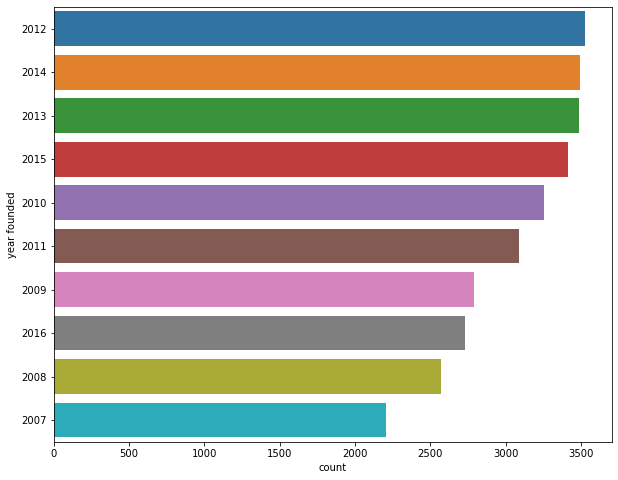

In [307]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='year founded', data = year_df.nlargest(10, 'count'))

The bar chart plotted above shows top 10 industries with year founded in their company names. The table above also proves this. Even though the sports industry has smaller number of companies in the dataset when compared to with the other industries ranking from 2-10, it is ranked as number 1 in the number of companiy names containing the year they were founded.

##### name and year founded

Here we will examine how many and which companies contain words from their respective years they were founded in their names.

In [310]:
def year_in_name(row):
    if (row['year founded'] == 0):
        return None
    year = row['year founded']
    regexp = re.compile(f'{year}')
    return regexp.search(row['name']) 

df['year_in_name'] = df.apply(year_in_name, axis=1).astype('bool').astype('int16')

In [311]:
name_year_df = df[df['year_in_name'] > 0]
name_year_df

name  \
31275                                  ajb bumiputera 1912   
45093    peapack-gladstone bank private banking since 1921   
68174               the car finance company (2007) limited   
70562                                          fabbri 1905   
72341                                          altrak 1978   
...                                                    ...   
7114170                                           gaia2001   
7117682                     gateway training services 2014   
7118339                       tony evans for congress 2016   
7129743                              profab mécanique 2010   
7164167                   1984 personal management limited   

                                 domain  year founded  \
31275                    bumiputera.com          1912   
45093                        pgbank.com          1921   
68174        thecarfinancecompany.co.uk          2007   
70562                    fabbri1905.com          1905   
72341                  altrak1978.co.id          1978   
...                                 ...           ...   
7114170                     gaia2001.it          2001   
7117682  gatewaytrainingservices2014.ca          2014   
7118339               votetonyevans.com          2016   
7129743                 descoprofab.com          2010   
7164167                      1984pm.com          1984   

                                 industry   size range  \
31275                           insurance  1001 - 5000   
45093                             banking   501 - 1000   
68174                  financial services    201 - 500   
70562                    food & beverages    201 - 500   
72341                           machinery    201 - 500   
...                                   ...          ...   
7114170         marketing and advertising       1 - 10   
7117682           staffing and recruiting       1 - 10   
7118339            political organization       1 - 10   
7129743                      construction       1 - 10   
7164167  professional training & coaching       1 - 10   

                                       locality         country  \
31275          jakarta, jakarta raya, indonesia       indonesia   
45093     bedminster, new jersey, united states   united states   
68174      hampshire, hampshire, united kingdom  united kingdom   
70562            bologna, emilia-romagna, italy           italy   
72341          jakarta, jakarta raya, indonesia       indonesia   
...                                         ...             ...   
7114170           modena, emilia-romagna, italy           italy   
7117682               red deer, alberta, canada          canada   
7118339                                     NaN             NaN   
7129743                 lachute, quebec, canada          canada   
7164167  london, greater london, united kingdom  united kingdom   

                                              linkedin url  \
31275             linkedin.com/company/ajb-bumiputera-1912   
45093          linkedin.com/company/peapack-gladstone-bank   
68174    linkedin.com/company/the-car-finance-company-2...   
70562                     linkedin.com/company/fabbri-1905   
72341                     linkedin.com/company/altrak-1978   
...                                                    ...   
7114170                      linkedin.com/company/gaia2001   
7117682  linkedin.com/company/gateway-training-services...   
7118339          linkedin.com/company/vote-tony-evans-2016   
7129743         linkedin.com/company/profab-m-canique-2010   
7164167  linkedin.com/company/1984-personal-management-...   

         current employee estimate  total employee estimate  ...  \
31275                          374                      625  ...   
45093                          257                      435  ...   
68174                          167                      315  ...   
70562                          161                      349  ...   
72341                          157   

Let's explore these companies with respect to their country, size range, industry and year founded.



##### year_in_name and country

In [312]:
country_df = name_year_df.groupby('country', as_index=False).agg({'name': 'count'}).rename(columns={'name': 'count'})
country_df =  country_df.sort_values(by='count',ascending=False).reset_index(drop=True)
country_counts_df = df['country'].value_counts().rename_axis('country').reset_index(name='total_count')
country_df = country_df.merge(country_counts_df, left_on='country', right_on='country', how = 'left')
country_df['country'] = country_df['country'].astype('string').str.title()
country_df

country  count  total_count
0            Italy    171       104724
1            Spain    142       138200
2    United States    139      2145990
3           Canada    102       177528
4   United Kingdom     65       473653
..             ...    ...          ...
65        Malaysia      1        10647
66           Malta      1         1751
67       Mauritius      1          960
68         Morocco      1         3813
69        Zimbabwe      1         2680

[70 rows x 3 columns]

In [313]:
# merge country_df and gdf
merged = gdf.merge(country_df, left_on='country', right_on='country', how = 'left')
merged.head()

country                                           geometry  count  \
0           Fiji  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...    NaN   
1       Tanzania  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...    1.0   
2      W. Sahara  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...    NaN   
3         Canada  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  102.0   
4  United States  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  139.0   

   total_count  
0          NaN  
1       1031.0  
2          NaN  
3     177528.0  
4    2145990.0

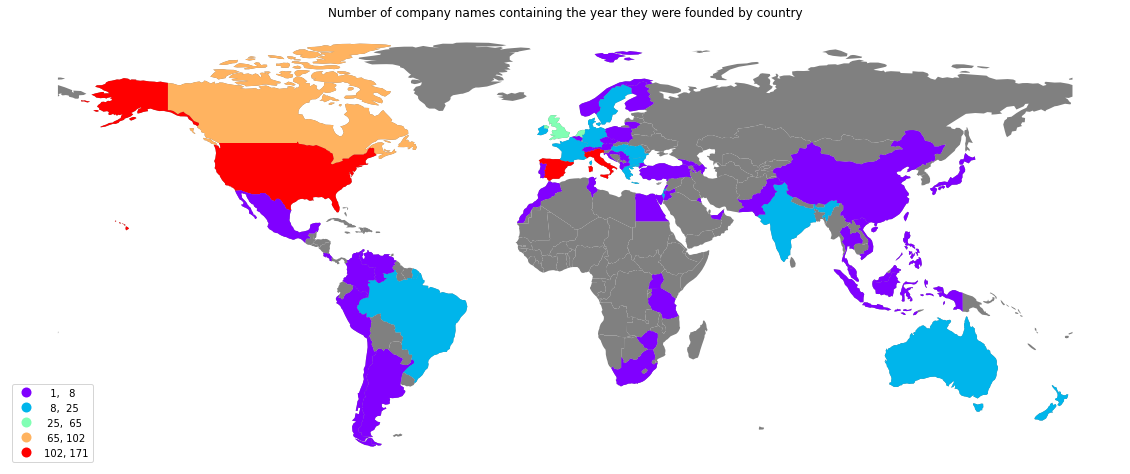

In [314]:
fig, ax = plt.subplots(1, figsize=(20,15))

merged.plot(color='grey', ax=ax, label = 'No data')
merged.dropna().plot(column='count', cmap='rainbow', ax=ax, scheme='natural_breaks', k=5, legend=True, legend_kwds={'loc': 'lower left'})

plt.title('Number of company names containing the year they were founded by country')

#fixing floating-point counts, making them integer:
leg = ax.get_legend()
for text in leg.get_texts():
    text.set_text(text.get_text().replace('.00', ''))

plt.axis('off');


##### year_in_name and size range

In [315]:
size_df = name_year_df.groupby('size range', as_index=False).agg({'name': 'count'}).rename(columns={'name': 'count'})
size_counts_df = df['size range'].value_counts().rename_axis('size range').reset_index(name='total_count')
size_df = size_df.merge(size_counts_df, left_on='size range', right_on='size range', how = 'left')
size_df =  size_df.sort_values(by='count',ascending=False).reset_index(drop=True)
size_df

size range  count  total_count
0       1 - 10    896      5123116
1      11 - 50    288      1065971
2     51 - 200     63       294242
3    201 - 500     14        67694
4  1001 - 5000      1        19721
5   501 - 1000      1        23581

As we can see from the result above, if a company's name contains the year it was founded the company tends to have a small number of employees. Again this also aligns with the general distibution of size range. So I don't think there is a special connection here.



##### year_in_name and industry

Let us check if these names are related to which industry.




In [318]:
industry_df = name_year_df.groupby('industry', as_index=False).agg({'name': 'count'}).rename(columns={'name': 'count'})
industry_counts_df = df['industry'].value_counts().rename_axis('industry').reset_index(name='total_count')
industry_df = industry_df.merge(industry_counts_df, left_on='industry', right_on='industry', how = 'left')
industry_df =  industry_df.sort_values(by='count',ascending=False).reset_index(drop=True)
industry_df

industry  count  total_count
0                                 sports     59        60997
1                           construction     58       250232
2    information technology and services     46       428200
3              marketing and advertising     45       319589
4                                 retail     44       117119
..                                   ...    ...          ...
120                             military      1         3586
121                   mental health care      1        26654
122                        biotechnology      1        26035
123                     medical practice      1        46747
124                  program development      1        13199

[125 rows x 3 columns]

In [319]:
industry_df.head(10)

industry  count  total_count
0                               sports     59        60997
1                         construction     58       250232
2  information technology and services     46       428200
3            marketing and advertising     45       319589
4                               retail     44       117119
5                     food & beverages     38        89887
6                    apparel & fashion     35        62261
7                          real estate     29       185008
8               luxury goods & jewelry     28        15307
9                management consulting     25       185604

<AxesSubplot:xlabel='count', ylabel='industry'>

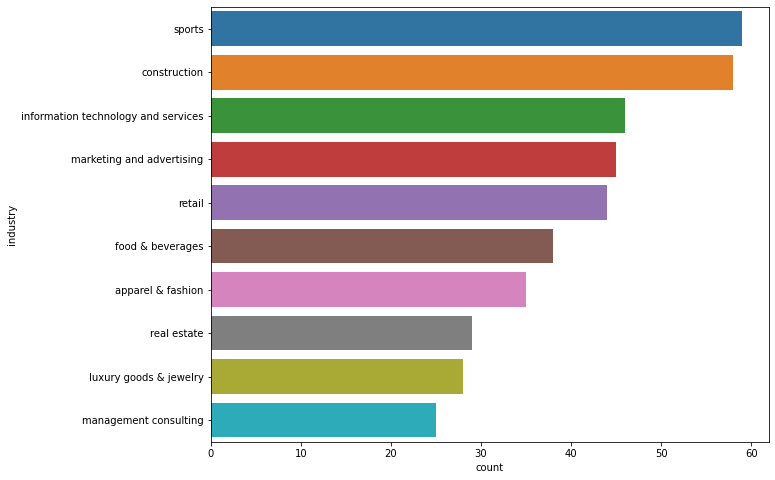

In [320]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='industry', data = industry_df.nlargest(10, 'count'))

The bar chart plotted above shows top 10 industries with year founded in their companiy names. Even though the sports industry has smaller number of companies in the dataset when compared to with the other industries ranking from 2-10, it is ranked as number 1 in the number of companiy names containing the year they were founded.

##### year_in_name and year founded

In [321]:
year_df = name_year_df.groupby('year founded', as_index=False).agg({'name': 'count'}).rename(columns={'name': 'count'})
year_counts_df = df['year founded'].value_counts().rename_axis('year founded').reset_index(name='total_count')
year_df = year_df.merge(year_counts_df, left_on='year founded', right_on='year founded', how = 'left')
year_df =  year_df.sort_values(by='count',ascending=False).reset_index(drop=True)
year_df['year founded'] = year_df['year founded'].astype('string')
year_df

year founded  count  total_count
0           2000    112        63462
1           2010     48       197100
2           2016     39       196849
3           2014     35       223763
4           2015     34       225321
..           ...    ...          ...
170         1914      1          996
171         1906      1         1135
172         1884      1          543
173         1896      1          829
174         1930      1         1547

[175 rows x 3 columns]

In [322]:
year_df.head(10)

year founded  count  total_count
0         2000    112        63462
1         2010     48       197100
2         2016     39       196849
3         2014     35       223763
4         2015     34       225321
5         2012     33       204219
6         2013     30       214206
7         2017     26       134877
8         2007     26       111899
9         1999     24        55154

<AxesSubplot:xlabel='count', ylabel='year founded'>

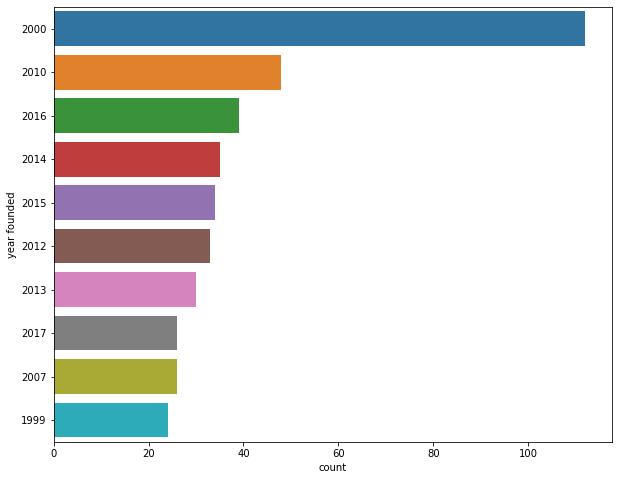

In [323]:
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='year founded', data = year_df.nlargest(10, 'count'))

Even though the number of companies founded in 2000 in the dataset are relatively smaller, it is ranked as number 1 in the number of company names containing the year they were founded. I think this is because the year 2000 is special as it is the start of a millenium, a year that comes once in a thousand years.

## Answering Business Questions and performing filteration of the dataset

### What can we learn about the business names? Are there structural differences in business names correlated with company size? Can I figure out what type of company it is?

##### Let's work on how many and what companies contain stop words?

In [324]:
def stopword_in_name(name):
    # split words in name and replace the & symbol with 'and' 
    name_words = re.split(r'\s|-',re.sub('&', ' and ', name))
    return len([i for i in name_words if i in STOPWORDS])
df['stopword_in_name_count'] = df['name'].apply(stopword_in_name)

In [325]:
stopword_df = df[df['stopword_in_name_count'] > 0]
stopword_df

name             domain  \
9                                                     at&t            att.com   
17                                    jpmorgan chase & co.  jpmorganchase.com   
38                          department of veterans affairs             va.gov   
59                            american center of krasnodar                NaN   
61       promobroker agente de seguros y de fianzas s a...                NaN   
...                                                    ...                ...   
7173390                                curl up & dye salon    curlupsalon.com   
7173397                     stone center for yoga & health      stoneyoga.com   
7173411                 fuller, hadeed, & ros-planas, pllc         fhrlaw.com   
7173413                      a w hargrove insurance agency                NaN   
7173423                         catholic bishop of chicago                NaN   

         year founded                      industry size range  \
9                1876            telecommunications     10001+   
17               1823            financial services     10001+   
38               1930     government administration     10001+   
59                  0          education management     10001+   
61                  0                     insurance     10001+   
...               ...                           ...        ...   
7173390             0                     cosmetics     1 - 10   
7173397             0  health, wellness and fitness     1 - 10   
7173411          2015                  law practice     1 - 10   
7173413             0                     insurance     1 - 10   
7173423             0        religious institutions     1 - 10   

                                                locality        country  \
9                           dallas, texas, united states  united states   
17                     new york, new york, united states  united states   
38       washington, district of columbia, united states  united states   
59                                                   NaN            NaN   
61                                                   NaN            NaN   
...                                                  ...            ...   
7173390                    hamilton, ohio, united states  united states   
7173397               teaneck, new jersey, united states  united states   
7173411          virginia beach, virginia, united states  united states   
7173413                  exmore, virginia, united states  united states   
7173423               inverness, illinois, united states  united states   

                                              linkedin url  \
9                                linkedin.com/company/at&t   
17                     linkedin.com/company/jpmorgan-chase   
38       linkedin.com/company/department-of-veterans-af...   
59       linkedin.com/company/american-center-of-krasnodar   
61       linkedin.com/company/promobroker-agente-de-seg...   
...                                                    ...   
7173390           linkedin.com/company/curl-up-&-dye-salon   
7173397  linkedin.com/company/stone-center-for-yoga-&-h...   
7173411                        linkedin.com/company/fhrlaw   
7173413  linkedin.com/company/a-w-hargrove-insurance-ag...   
7173423    linkedin.com/company/catholic-bishop-of-chicago   

         current employee estimate  total employee estimate  ...  \
9                           115188                   269659  ...   
17                           95234                   242135  ...   
38                           62685                    86489  ...   
59                           47345                    47924  ...   
61                           44926                    45655  ...   
...                            ...                      ...  ...   
7173390                          0                        1  ...   
7173397                          0                        2  ...   
7173411                       

There are more than 930,000 companies whose names contain atleast one stop word.

##### Which words are the most common in company names of each industry?

In [326]:
industries = list(df['industry'].unique())
industry_name_words_dict = {}
for industry in industries:
    industry_df = df[df['industry'] == f'{industry}']
    text = " ".join(name for name in industry_df.name)
    word_list = list(filter(lambda x: x!= '', re.split(r'\s|-', text)))
    common_words = [pair[0] for pair in collections.Counter(word_list).most_common(50)]
    industry_name_words_dict[f'{industry}'] = common_words


In [327]:
def append_list(a,b):
    return a + b
all_words = reduce(append_list, list(industry_name_words_dict.values()))

In [328]:
# select common words found in atleast 20 industries
common_words = [pair[0] for pair in dict(collections.Counter(all_words)).items() if pair[1] > 20]
words_to_be_removed = common_words + re.split(r'',string.punctuation) + list(STOPWORDS)

In [329]:
for (industry, words) in industry_name_words_dict.items():
    industry_name_words_dict[industry] = [word for word in words if word not in words_to_be_removed]


We can look at common words in company names from a specific industry as follows.

In [330]:
industry_name_words_dict['financial services']

['financial',
 'capital',
 'finance',
 'wealth',
 'mortgage',
 'partners',
 'credit',
 'advisors',
 'investment',
 'asset',
 'planning',
 'union',
 'group,',
 'advisory',
 'securities',
 'investments',
 'funding',
 'bank',
 'services,',
 'llp',
 'first',
 'insurance',
 'home',
 'consultants']

In [331]:
def search_industry(word):
    industries_list = []
    for (industry, words) in industry_name_words_dict.items():
        if word in words:
            industries_list.append(industry)
    return industries_list

To search for a word if it is in the list of most common word for industries we can use the function search_industry as shown below.

In [333]:
search_industry('communication')

['telecommunications',
 'translation and localization',
 'wireless',
 'public relations and communications',
 'marketing and advertising',
 'graphic design']

##### How many and which company names contain punctuations?

In [339]:
punc_df = df[df['name_punc_count'] > 0]
punc_df

name              domain  year founded  \
9                                      at&t             att.com          1876   
17                     jpmorgan chase & co.   jpmorganchase.com          1823   
30                   mcdonald's corporation  aboutmcdonalds.com          1955   
57         ayatama energi, trisco nusantara                 NaN          1999   
93                                  l'oréal          loreal.com             0   
...                                     ...                 ...           ...   
7173397      stone center for yoga & health       stoneyoga.com             0   
7173402                      woonartikel.nl      woonartikel.nl          2015   
7173404                   squad sp. z o. o.        squad.com.pl          2013   
7173411  fuller, hadeed, & ros-planas, pllc          fhrlaw.com          2015   
7173416                     fit plus s.r.o.          fitplus.sk          1993   

                             industry size range  \
9                  telecommunications     10001+   
17                 financial services     10001+   
30                        restaurants     10001+   
57                             design     10001+   
93                          cosmetics     10001+   
...                               ...        ...   
7173397  health, wellness and fitness     1 - 10   
7173402                  online media     1 - 10   
7173404                      internet     1 - 10   
7173411                  law practice     1 - 10   
7173416  health, wellness and fitness     1 - 10   

                                        locality        country  \
9                   dallas, texas, united states  united states   
17             new york, new york, united states  united states   
30            oak brook, illinois, united states  united states   
57                                           NaN            NaN   
93                  paris, île-de-france, france         france   
...                                          ...            ...   
7173397       teaneck, new jersey, united states  united states   
7173402       giethoorn, overijssel, netherlands    netherlands   
7173404           litzmannstadt, lodzkie, poland         poland   
7173411  virginia beach, virginia, united states  united states   
7173416       bratislava, bratislavský, slovakia       slovakia   

                                              linkedin url  \
9                                linkedin.com/company/at&t   
17                     linkedin.com/company/jpmorgan-chase   
30             linkedin.com/company/mcdonald's-corporation   
57       linkedin.com/company/ayatama-energi-trisco-nus...   
93                             linkedin.com/company/loreal   
...                                                    ...   
7173397  linkedin.com/company/stone-center-for-yoga-&-h...   
7173402                linkedin.com/company/woonartikel.nl   
7173404             linkedin.com/company/squad-sp.-z-o.-o.   
7173411                        linkedin.com/company/fhrlaw   
7173416               linkedin.com/company/fit-plus-s.r.o.   

         current employee estimate  total employee estimate  ...  \
9                           115188                   269659  ...   
17                           95234                   242135  ...   
30                           68233                   235199  ...   
57                           48806                    49370  ...   
93                           37319                   107296  ...   
...                            ...                      ...  ...   
7173397                          0                        2  ...   
7173402                          0                        1  ...   
7173404                          0                        1  ...   
7173411                          0                        2  ...   
7173416                          0                        1  ...   

        name_word_count  name_word_density  name_punc_count  \
9          

There are more than 1,700,000 companies whose names contain atleast one punctuation mark.

##### Which words are the most common in company names of each industry?

In [341]:
industries = list(df['industry'].unique())
industry_name_words_dict = {}
for industry in industries:
    industry_df = df[df['industry'] == f'{industry}']
    text = " ".join(name for name in industry_df.name)
    word_list = list(filter(lambda x: x!= '', re.split(r'\s|-', text)))
    common_words = [pair[0] for pair in collections.Counter(word_list).most_common(50)]
    industry_name_words_dict[f'{industry}'] = common_words

In [342]:
def append_list(a,b):
    return a + b
all_words = reduce(append_list, list(industry_name_words_dict.values()))

In [343]:
# select common words found in atleast 20 industries
common_words = [pair[0] for pair in dict(collections.Counter(all_words)).items() if pair[1] > 20]
words_to_be_removed = common_words + re.split(r'',string.punctuation) + list(STOPWORDS)

In [344]:
for (industry, words) in industry_name_words_dict.items():
    industry_name_words_dict[industry] = [word for word in words if word not in words_to_be_removed]

We can look at common words in company names from a specific industry as follows.

In [345]:
industry_name_words_dict['financial services']

['financial',
 'capital',
 'finance',
 'wealth',
 'mortgage',
 'partners',
 'credit',
 'advisors',
 'investment',
 'asset',
 'planning',
 'union',
 'group,',
 'advisory',
 'securities',
 'investments',
 'funding',
 'bank',
 'services,',
 'llp',
 'first',
 'insurance',
 'home',
 'consultants']

In [346]:
def search_industry(word):
    industries_list = []
    for (industry, words) in industry_name_words_dict.items():
        if word in words:
            industries_list.append(industry)
    return industries_list

To search for a word if it is in the list of most common word for industries we can use the function search_industry as shown below.

In [348]:
search_industry('communication')

['telecommunications',
 'translation and localization',
 'wireless',
 'public relations and communications',
 'marketing and advertising',
 'graphic design']

##### Which words are the most common in company names of each size range?

In [334]:
size_ranges = list(df['size range'].unique())
size_range_name_words_dict = {}
for size_range in size_ranges:
    size_range_df = df[df['size range'] == f'{size_range}']
    text = " ".join(name for name in size_range_df.name)
    word_list = list(filter(lambda x: x!= '', re.split(r'\s|-', text)))
    common_words = [pair[0] for pair in collections.Counter(word_list).most_common(50)]
    size_range_name_words_dict[f'{size_range}'] = common_words

In [335]:
all_words = reduce(append_list, list(size_range_name_words_dict.values()))

In [336]:
# select common words found in atleast 3 size ranges
common_words = [pair[0] for pair in dict(collections.Counter(all_words)).items() if pair[1] > 2]
words_to_be_removed = common_words + re.split(r'',string.punctuation) + list(STOPWORDS)

In [337]:
for (size_range, words) in size_range_name_words_dict.items():
    size_range_name_words_dict[size_range] = [word for word in words if word not in words_to_be_removed]

Let's look at common words in company names for each size range.

In [338]:
size_range_name_words_dict

{'10001+': ['us',
  'american',
  'hotels',
  'air',
  'government',
  'south',
  'china',
  'airways',
  'canada',
  'life',
  'none',
  'care',
  'education',
  'financial'],
 '5001 - 10000': ['universidad',
  'financial',
  'life',
  'industries',
  'service',
  'canada',
  'american'],
 '1001 - 5000': ['universidad', 'la', 'council', 'trust', 'llp', 'energy'],
 '501 - 1000': ['la', 'energy', 'trust'],
 '201 - 500': [],
 '51 - 200': ['ab', 'hotel', 'spa', 'sa', 'software', 'co.,'],
 '11 - 50': ['srl',
  'design',
  'marketing',
  'capital',
  'associates',
  'ab',
  'partners',
  'association',
  'b.v.',
  'sa',
  'hotel'],
 '1 - 10': ['design',
  'marketing',
  'studio',
  'co',
  'construction',
  'associates',
  'digital',
  'law',
  'capital',
  'pty',
  'srl',
  'service',
  'club',
  'creative']}

In [351]:
def search_size_range(word):
    size_ranges_list = []
    for (size_range, words) in size_range_name_words_dict.items():
        if word in words:
            size_ranges_list.append(size_range)
    return size_ranges_list

To search for a word if it is in the list of most common word for size_ranges we can use the function search_size_range as shown below.

In [361]:
search_size_range('hotel')

['51 - 200', '11 - 50']

In [362]:
search_size_range('capital')

['11 - 50', '1 - 10']

In [363]:
search_size_range('air')

['10001+']

In [364]:
search_size_range('marketing')

['11 - 50', '1 - 10']

In [365]:
search_size_range('software')

['51 - 200']

Therefore it is easier to find out the type of company according to their preferred size range.

### Conclusion

##### About the business names

- From the `business names` we can learn alot for example the most common words are related to company structure like pvt, ltd, limited, co, inc and group. Country and Industry names are also frequent.

-  The most common industry is information technology and services.
- Majiority of the companies have employees less that or equal to 50.
- On average the countries 'Czechia', 'Slovenia', 'Slovakia', 'China', 'Croatia', 'Venezuela', 'Thailand', 'Taiwan', and 'Bosnia And Herzegovina' have the highest number of punctuation marks in their company names.
- On average the countries 'Taiwan', 'Guadeloupe', 'South Korea', 'Venezuela', 'Albania', and 'Curaçao' have the highest number of digits in their company names
- 'Belarus', 'Russia', 'Turkey', 'Iran', and 'Kazakhstan' are the countries with the highest number of non-aschii characters in their company names on average.
- 'marketing and advertising', 'management consulting', 'construction', 'hospital & health care', and 'information technology and services' are top 5 industries with the highest number of companies with names containing atleast one word from their respective industry.
- 'sports', 'construction', 'information technology and services', 'marketing and advertising', and 'retail' are top 5 industries with the highest number of companies with names containing the year they were founded.

##### Correlation with business names and company size

- There are structural differences in business names correlated with company size
- With each company size there are different sorts of words associated with the company names.
- It is easier to find out what type of company is it according to the size range. For example, for the size range of 11 - 50 and 1 - 10 it is the company that deals with marketing and capital, which is more of a financial company. 
- For company size range of 51 - 200, it is a software oriented company